# *Project Outline*

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Read all CSV files and combine them
decay_files = [f'db_decay_{i}.csv' for i in range(1, 124)]  # Files 1 to 123
all_data = []

for file in decay_files:
    try:
        df = pd.read_csv(file)
        # Add the date from filename (we'll extract it properly later)
        df['file_number'] = int(file.split('_')[2].split('.')[0])
        all_data.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all dataframes
decay_data = pd.concat(all_data, ignore_index=True)

# Display basic information about the dataset
print("\nDataset Info:")
print(decay_data.info())

print("\nSample of the data:")
print(decay_data.head())

print("\nColumn names:")
for col in decay_data.columns:
    print(f"- {col}")

print("\nBasic statistics:")
print(decay_data.describe())


Error reading db_decay_60.csv: [Errno 2] No such file or directory: 'db_decay_60.csv'

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67681 entries, 0 to 67680
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Merchant                            67681 non-null  object
 1   Item                                67681 non-null  object
 2   Card Type                           67681 non-null  object
 3   Transaction Day Of Week             67681 non-null  object
 4   Card Bin Number                     67681 non-null  int64 
 5   Ship State                          67680 non-null  object
 6   Attempted Charges                   67681 non-null  int64 
 7   Declined Charges                    67681 non-null  int64 
 8   Declined Charge Rate                67681 non-null  object
 9   Successful Charges                  67681 non-null  int64 
 10  Success Charge Ra

### **1. Create a pipeline where we get all the files for the last 4 months of data**
* Here we will use loops and Playwright in order to get the daily export of the file for the last 4 months.
* Once we have all the csvs we will then join them up into one big spreadsheet.
* We need to make sure that the data also has the dates for each of the exports as this will be crucial for applying the models in question.

### **2. We pre-process the data**
* Convert them all to integers and check for missing values so we can follow onto the feature engineering section.

### **3. Feature Engineering**
* Make all necessary transformations here, most importantly will be to turn the categorical variables into one-hot-encoding.
* Another important part will be to retrieve data from certain columns and retrieving information from those such that we can create new, normalised columns.
* Also, we will have to create a lot of ratios, these might be able to capture more than impact of chargebacks and refunds etc. 

### **4. We then have to loop over the database and apply the model to each midid**
* In this way we can have models that are trained for each midid, hopefully giving us better predictions on each

### **5. Check for optimal lag in the dataset**
* We need to determine the optimal lag period that should be applied before running the model to capture the temporal relationships in the data effectively.
* This involves testing different lag periods and evaluating which provides the best predictive performance for approval rates.

### **6. Apply different models and determine the best approach**
* Test various machine learning models (e.g., Lasso, Random Forest, XGBoost, etc.) to see which performs best for each midid.
* Consider creating ensemble models that combine multiple approaches for improved prediction accuracy.
* Evaluate model performance using appropriate metrics and cross-validation techniques.

### **7. Once we have the models for each we will check the variables, see which explain the highest variance in the dependent variable (Approval Rates)**

### **8. Delivery**
* We will have to create a dashboard where we explain the models and the results of the features, especially if we use the Lasso. Random Forest will also be very easy to explain results.
* We should also plot the midids against time and their approvals, so we can visualize how they change across time, in general. 

## **1. Create a pipeline where we get all the files for the last 4 months of data**

### 1.1. **The playwright code that willl be fetching the data and constantly update the datasbe will actually be a python script, so this section willl be empty.**

In [130]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Get current date
today = datetime.now()

# Calculate start date (4 months ago)
start_date = today - relativedelta(months=4)

# Function to format date as MM/DD/YYYY
def format_date(date):
    return date.strftime("%m/%d/%Y")

# Loop through each day from start date to today
current_date = start_date
while current_date <= today:
    formatted_date = format_date(current_date)
    print(f"{formatted_date} - {formatted_date}")
    
    # Move to next day
    current_date += timedelta(days=1)

# Alternative: Store dates in a list
dates = []
loop_date = start_date
while loop_date <= today:
    formatted_date = format_date(loop_date)
    dates.append(f"{formatted_date} - {formatted_date}")
    loop_date += timedelta(days=1)

print(f"\nTotal days: {len(dates)}")


04/01/2025 - 04/01/2025
04/02/2025 - 04/02/2025
04/03/2025 - 04/03/2025
04/04/2025 - 04/04/2025
04/05/2025 - 04/05/2025
04/06/2025 - 04/06/2025
04/07/2025 - 04/07/2025
04/08/2025 - 04/08/2025
04/09/2025 - 04/09/2025
04/10/2025 - 04/10/2025
04/11/2025 - 04/11/2025
04/12/2025 - 04/12/2025
04/13/2025 - 04/13/2025
04/14/2025 - 04/14/2025
04/15/2025 - 04/15/2025
04/16/2025 - 04/16/2025
04/17/2025 - 04/17/2025
04/18/2025 - 04/18/2025
04/19/2025 - 04/19/2025
04/20/2025 - 04/20/2025
04/21/2025 - 04/21/2025
04/22/2025 - 04/22/2025
04/23/2025 - 04/23/2025
04/24/2025 - 04/24/2025
04/25/2025 - 04/25/2025
04/26/2025 - 04/26/2025
04/27/2025 - 04/27/2025
04/28/2025 - 04/28/2025
04/29/2025 - 04/29/2025
04/30/2025 - 04/30/2025
05/01/2025 - 05/01/2025
05/02/2025 - 05/02/2025
05/03/2025 - 05/03/2025
05/04/2025 - 05/04/2025
05/05/2025 - 05/05/2025
05/06/2025 - 05/06/2025
05/07/2025 - 05/07/2025
05/08/2025 - 05/08/2025
05/09/2025 - 05/09/2025
05/10/2025 - 05/10/2025
05/11/2025 - 05/11/2025
05/12/2025 - 05/

## **1. Create a pipeline where we get all the files for the last 4 months of data**


Now that we have all the files with the daily reports we can now start doing the manipulations needed to obtain the needed database.

1) We will start by joining all the the files into one database / excel sheet called "Decay_Data";
2) We will add a column called datem we can use the same loop to fill in the Vrio daterange to fill in the date of each file. 
3) Once we have this, we can then organise / loop over each unique mid and see performance over time;


### **1.1) We are going to iterate over the all the exisiting mid decay reports and join them up into a new file called Decay_Data. We also added the Date column**

In [131]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

def get_date_range():
    """Function to generate dates for the last 4 months"""
    # Get current date
    today = datetime.today()
    
    # Calculate start date (4 months ago) 
    start_date = today - relativedelta(months=4)
    
    # Initialize list to store dates
    date_list = []
    
    # Loop through each day from start date to today
    current_date = start_date
    while current_date <= today:
        # Format date as string
        formatted_date = current_date.strftime("%m/%d/%Y")
        date_list.append(formatted_date)
        
        # Move to next day
        current_date += timedelta(days=1)
        
    return date_list

# Get list of dates
dates = get_date_range()
print(f"Generated {len(dates)} dates from {dates[0]} to {dates[-1]}")
dates


Generated 123 dates from 04/01/2025 to 08/01/2025


['04/01/2025',
 '04/02/2025',
 '04/03/2025',
 '04/04/2025',
 '04/05/2025',
 '04/06/2025',
 '04/07/2025',
 '04/08/2025',
 '04/09/2025',
 '04/10/2025',
 '04/11/2025',
 '04/12/2025',
 '04/13/2025',
 '04/14/2025',
 '04/15/2025',
 '04/16/2025',
 '04/17/2025',
 '04/18/2025',
 '04/19/2025',
 '04/20/2025',
 '04/21/2025',
 '04/22/2025',
 '04/23/2025',
 '04/24/2025',
 '04/25/2025',
 '04/26/2025',
 '04/27/2025',
 '04/28/2025',
 '04/29/2025',
 '04/30/2025',
 '05/01/2025',
 '05/02/2025',
 '05/03/2025',
 '05/04/2025',
 '05/05/2025',
 '05/06/2025',
 '05/07/2025',
 '05/08/2025',
 '05/09/2025',
 '05/10/2025',
 '05/11/2025',
 '05/12/2025',
 '05/13/2025',
 '05/14/2025',
 '05/15/2025',
 '05/16/2025',
 '05/17/2025',
 '05/18/2025',
 '05/19/2025',
 '05/20/2025',
 '05/21/2025',
 '05/22/2025',
 '05/23/2025',
 '05/24/2025',
 '05/25/2025',
 '05/26/2025',
 '05/27/2025',
 '05/28/2025',
 '05/29/2025',
 '05/30/2025',
 '05/31/2025',
 '06/01/2025',
 '06/02/2025',
 '06/03/2025',
 '06/04/2025',
 '06/05/2025',
 '06/06/20

In [132]:
import os
import pandas as pd
current_dir = os.getcwd()
dir_files = os.listdir(current_dir)

# Our centralized database for the project 
Decay_Data = pd.DataFrame()

# Import the csv df 
df_decay = pd.read_csv("db_decay_1.csv")
columns_needed = df_decay.columns

# Decay data columns must be the same as columns_needed
Decay_Data = pd.DataFrame(columns=columns_needed)

# Add a new column called Date and put in this first position of the columns
Decay_Data.insert(0, "Date", "")

# We iterate over all the reports for decay
decay_file_count = 0
for file in dir_files:
    if "db_decay" in file:
        df_decay = pd.read_csv(file)
        if decay_file_count < len(dates):  # Check if we have a corresponding date
            df_decay.insert(0, "Date", dates[decay_file_count])
            Decay_Data = pd.concat([Decay_Data, df_decay], ignore_index=True)
            decay_file_count += 1
        else:
            print(f"Warning: More decay files than dates available. Skipping {file}")
            
Decay_Data.shape

# Export the database to a csv file
Decay_Data.to_csv("Decay_Data.csv", index=False)
Decay_Data.head()


,Date,Merchant,Item,Card Type,Transaction Day Of Week,Card Bin Number,Ship State,Attempted Charges,Declined Charges,Declined Charge Rate,Successful Charges,Success Charge Rate,Unique Cycle Attempts,Declined Unique Cycle Attempts,Declined Unique Cycle Attempt Rate,Successful Unique Cycle Attempts,Success Unique Cycle Attempt Rate,Cycle 1 Attempts,Cycle 1 Success,Cycle 1 Revenue,Cycle 1 Decline,Cycle 1 Success Rate,Renewal Attempts,Renewal Success,Renewal Revenue,Renewal Decline,Renewal Success Rate,Successful Offers,Item Quantity,Successful Customers,Gross Product Revenue,Discounts,Rewards,Net Product Revenue,Shipping,Gift Cards,Total Revenue,Tax,Processed,Adjustments,Adjustment Rate,Refunds,Refund Rate,Refunded Revenue,Refunded Revenue Rate,Voids,Void Rate,Voided Revenue,Void Revenue Rate,Chargebacks,Chargeback Rate,Chargeback Revenue,Chargeback Revenue Rate,Alerts,Alert Rate,Alert Revenue,Alert Revenue Rate,Net Revenue,Cost of Revenue,Cost of Goods Sold,Cycle 1 Cost of Goods Sold,Recurring Cost of Goods Sold,Ad Spend,Ad Spend Rate,Chargeback Fees,Chargeback Fees Rate,Alert Fees,Alert Fees Rate,Processing Fees,Processing Fees Rate,Profit,Profit Margin
0,04/01/2025,17 - N2_RM_17_SIGNA_ESQ_BrightAdvantageLLC_388...,DP1 V3,Visa,Tuesday,444796,CA,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
1,04/01/2025,20 - CLOSED_RM_20_SIGNAPAY_UniquePlusLLC_4129_50K,DP1 V3,Visa,Tuesday,401154,FL,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
2,04/01/2025,20 - CLOSED_RM_20_SIGNAPAY_UniquePlusLLC_4129_50K,DP1 V3,Visa,Tuesday,442326,WI,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
3,04/01/2025,21 - RM_21_QUANT_CBSL_BrightAdvantageLLC_3462_25K,DP1 V3,Mastercard,Tuesday,510553,TN,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%
4,04/01/2025,21 - RM_21_QUANT_CBSL_BrightAdvantageLLC_3462_25K,DP1 V3,Mastercard,Tuesday,514616,TX,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%


## **2. Data Pre-processing**


### **2.1) Date column**

In [133]:
# Convert Date column to datetime format with month/date/year format
Decay_Data["Date"] = pd.to_datetime(Decay_Data["Date"], format="%m/%d/%Y")
Decay_Data["Date"]

# Get the min and max of the Dqte column
min_date = Decay_Data["Date"].min()
max_date = Decay_Data["Date"].max()
print(f"Minimum date: {min_date}, Maximum date: {max_date}")



Minimum date: 2025-04-01 00:00:00, Maximum date: 2025-07-31 00:00:00


### **2.2) Merchant column**


Here we will use the Merchant Column in order to create a number of different columns aka the one hot encoding formf for the processors and the corp names. 
- 1) Merhcan now only becomes the number that we can see here so its the first item of the split in _
- 2) One-Hot-Encoding of processors.

#### **2.2.1) Retrieve the Mid ids and create a new column (MID)**

In [134]:
# List of mids 
list_mids = []

# List of processor 
list_processor = []
list_corp = []
# Use a set to store unique lengths of split merchant strings
unique_len = set()
list_p_c = Decay_Data["Merchant"]      
for item in list_p_c:
    # split item on _
    item_split = item.split("_")
    unique_len.add(len(item_split))
print(unique_len)

for item in list_p_c:
    item_split = item.split("_")
    if len(item_split) == 6:

        mid = item_split[0]
        mid = mid.split(" - ")
        mid = mid[0]
        mid = int(mid)

        processor = processor.replace(" ", "_")
        processor = item_split[2]
        corp = item_split[-3]
        list_mids.append(mid)
        list_processor.append(processor)
        list_corp.append(corp)
        #print(f"MID is {mid}, Processor is {processor}, Corporation is {corp}")
    elif len(item_split) == 7:
        mid = item_split[0]
        mid = mid.split(" - ")
        mid = mid[0]
        
        processor = processor.replace(" ", "_")
        processor = item_split[3]
        
        corp = item_split[-3]
        list_mids.append(mid)
        #print(f"MID is {mid}, Processor is {processor}, Corporation is {corp}") 
    
    elif len(item_split) == 8:
        mid = item_split[0]
        mid = mid.split(" - ")
        mid = mid[0]
        mid = int(mid)
        
        processor1 = item_split[3]
        processor2 = item_split[4]
        processor = processor1 + " " + processor2
        processor = processor.replace(" ", "_")
        processor = processor.lower()
    
        corp = item_split[-3]       
        list_mids.append(mid)
        list_processor.append(processor)
        list_corp.append(corp)
        #print(f"MID is {mid}, Processor is {processor}, Corporation is {corp}") 
    
    elif len(item_split) == 9:

        mid = item_split[0]
        mid = mid.split(" - ")
        mid = mid[0]
        mid = int(mid)
        
        processor1 = item_split[3]
        processor2 = item_split[4]
        processor = processor1 + " " + processor2
        processor = processor.replace(" ", "_")
        corp = item_split[-3]       
        list_mids.append(mid)
        list_processor.append(processor)
        list_corp.append(corp)
        #print(f"MID is {mid}, Processor is {processor}, Corporation is {corp}") 

# Convert list_mids to a set to remove duplicates
len(list_mids) == Decay_Data.shape[0]

{8, 9, 6, 7}


True

In [135]:
# using the list that we have of all the mid values now we will create a new column called MID, which are these values 
# Insert MID column as second column (after Date)
Decay_Data.insert(1, "MID", list_mids)
Decay_Data["MID"] = Decay_Data["MID"].astype(int)
Decay_Data.head()

,Date,MID,Merchant,Item,Card Type,Transaction Day Of Week,Card Bin Number,Ship State,Attempted Charges,Declined Charges,Declined Charge Rate,Successful Charges,Success Charge Rate,Unique Cycle Attempts,Declined Unique Cycle Attempts,Declined Unique Cycle Attempt Rate,Successful Unique Cycle Attempts,Success Unique Cycle Attempt Rate,Cycle 1 Attempts,Cycle 1 Success,Cycle 1 Revenue,Cycle 1 Decline,Cycle 1 Success Rate,Renewal Attempts,Renewal Success,Renewal Revenue,Renewal Decline,Renewal Success Rate,Successful Offers,Item Quantity,Successful Customers,Gross Product Revenue,Discounts,Rewards,Net Product Revenue,Shipping,Gift Cards,Total Revenue,Tax,Processed,Adjustments,Adjustment Rate,Refunds,Refund Rate,Refunded Revenue,Refunded Revenue Rate,Voids,Void Rate,Voided Revenue,Void Revenue Rate,Chargebacks,Chargeback Rate,Chargeback Revenue,Chargeback Revenue Rate,Alerts,Alert Rate,Alert Revenue,Alert Revenue Rate,Net Revenue,Cost of Revenue,Cost of Goods Sold,Cycle 1 Cost of Goods Sold,Recurring Cost of Goods Sold,Ad Spend,Ad Spend Rate,Chargeback Fees,Chargeback Fees Rate,Alert Fees,Alert Fees Rate,Processing Fees,Processing Fees Rate,Profit,Profit Margin
0,2025-04-01,17,17 - N2_RM_17_SIGNA_ESQ_BrightAdvantageLLC_388...,DP1 V3,Visa,Tuesday,444796,CA,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
1,2025-04-01,20,20 - CLOSED_RM_20_SIGNAPAY_UniquePlusLLC_4129_50K,DP1 V3,Visa,Tuesday,401154,FL,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
2,2025-04-01,20,20 - CLOSED_RM_20_SIGNAPAY_UniquePlusLLC_4129_50K,DP1 V3,Visa,Tuesday,442326,WI,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
3,2025-04-01,21,21 - RM_21_QUANT_CBSL_BrightAdvantageLLC_3462_25K,DP1 V3,Mastercard,Tuesday,510553,TN,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%
4,2025-04-01,21,21 - RM_21_QUANT_CBSL_BrightAdvantageLLC_3462_25K,DP1 V3,Mastercard,Tuesday,514616,TX,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%


#### **2.2.2) Get all the unqiue processor names and create a one hot encoding form of these**

In [136]:
Decay_Data.head()

,Date,MID,Merchant,Item,Card Type,Transaction Day Of Week,Card Bin Number,Ship State,Attempted Charges,Declined Charges,Declined Charge Rate,Successful Charges,Success Charge Rate,Unique Cycle Attempts,Declined Unique Cycle Attempts,Declined Unique Cycle Attempt Rate,Successful Unique Cycle Attempts,Success Unique Cycle Attempt Rate,Cycle 1 Attempts,Cycle 1 Success,Cycle 1 Revenue,Cycle 1 Decline,Cycle 1 Success Rate,Renewal Attempts,Renewal Success,Renewal Revenue,Renewal Decline,Renewal Success Rate,Successful Offers,Item Quantity,Successful Customers,Gross Product Revenue,Discounts,Rewards,Net Product Revenue,Shipping,Gift Cards,Total Revenue,Tax,Processed,Adjustments,Adjustment Rate,Refunds,Refund Rate,Refunded Revenue,Refunded Revenue Rate,Voids,Void Rate,Voided Revenue,Void Revenue Rate,Chargebacks,Chargeback Rate,Chargeback Revenue,Chargeback Revenue Rate,Alerts,Alert Rate,Alert Revenue,Alert Revenue Rate,Net Revenue,Cost of Revenue,Cost of Goods Sold,Cycle 1 Cost of Goods Sold,Recurring Cost of Goods Sold,Ad Spend,Ad Spend Rate,Chargeback Fees,Chargeback Fees Rate,Alert Fees,Alert Fees Rate,Processing Fees,Processing Fees Rate,Profit,Profit Margin
0,2025-04-01,17,17 - N2_RM_17_SIGNA_ESQ_BrightAdvantageLLC_388...,DP1 V3,Visa,Tuesday,444796,CA,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
1,2025-04-01,20,20 - CLOSED_RM_20_SIGNAPAY_UniquePlusLLC_4129_50K,DP1 V3,Visa,Tuesday,401154,FL,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
2,2025-04-01,20,20 - CLOSED_RM_20_SIGNAPAY_UniquePlusLLC_4129_50K,DP1 V3,Visa,Tuesday,442326,WI,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%
3,2025-04-01,21,21 - RM_21_QUANT_CBSL_BrightAdvantageLLC_3462_25K,DP1 V3,Mastercard,Tuesday,510553,TN,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%
4,2025-04-01,21,21 - RM_21_QUANT_CBSL_BrightAdvantageLLC_3462_25K,DP1 V3,Mastercard,Tuesday,514616,TX,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%


In [137]:
def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()         # Remove leading/trailing spaces
        .str.lower()                   # Convert to lowercase
        .str.replace(r'\W+', '_', regex=True)  # Replace non-word characters with '_'
        .str.replace(r'_+', '_', regex=True)   # Remove multiple consecutive '_'
        .str.rstrip('_')                # Remove trailing '_'
    )
    return df

Decay_Data = clean_column_names(Decay_Data)

In [138]:
# List of mids 
list_mids = []
count = 0
# List of processor 
list_processor = []
list_corp = []

processor_dict = {}
corp_dict = {}

for row in Decay_Data.itertuples(index=True):
    indexx = row.Index
    Merchant = row.merchant
    item_split = Merchant.split("_")
    
    if len(item_split) == 6:
        processor = item_split[2]
        corp = item_split[-3]
        processor = processor.replace(" ", "_")
        processor = processor.lower()
        processor = f"processor_{processor}"
        list_processor.append(processor)
        list_corp.append(corp)

    elif len(item_split) == 7:
        processor = item_split[3]
        corp = item_split[-3]
        processor = processor.replace(" ", "_")
        processor = processor.lower()
        processor = f"processor_{processor}"
        list_processor.append(processor)
        list_corp.append(corp)

    elif len(item_split) == 8:
        processor1 = item_split[3]
        processor2 = item_split[4]
        processor = processor1 + " " + processor2
        corp = item_split[-3]
        processor = processor.replace(" ", "_")
        processor = processor.lower()
        processor = f"processor_{processor}"
        list_processor.append(processor)
        list_corp.append(corp)

    elif len(item_split) == 9:
        processor1 = item_split[3]
        processor2 = item_split[4]
        processor = processor1 + " " + processor2    
        corp = item_split[-3]
        processor = processor.replace(" ", "_")
        processor = processor.lower()
        processor = f"processor_{processor}"
        list_processor.append(processor)
        list_corp.append(corp)

    processor = processor.replace(" ", "_")
    processor_dict[indexx] =f"{processor}"  
    corp_dict[indexx] =f"{corp}"

new_set_processor = set(list_processor)


In [139]:
new_set_processor

{'processor_71_psf',
 'processor_72_psf',
 'processor_apps_syn',
 'processor_bbva',
 'processor_cbc',
 'processor_cbsl',
 'processor_esq',
 'processor_evo',
 'processor_merchantindustries',
 'processor_net_esq',
 'processor_payarc_evo',
 'processor_prior_syn',
 'processor_psf_bbva',
 'processor_psf_pnc',
 'processor_quant_cbsl',
 'processor_signa_esq',
 'processor_signapay',
 'processor_syn'}

In [140]:
# Add all the names in new_set_processor to Decay_Data as column names 
for processor in new_set_processor:
    Decay_Data[processor] = 0


In [141]:
# Now we add the values 1 for the on hot encoding usinb the dict, as we can see all the values are in the column of the main dataframe
for key, value in processor_dict.items():
    if value not in Decay_Data.columns:
        print(f"Value {value} is in Decay_Data.columns")

In [142]:
# Debugger
# Create a function that checks all columns that have the word 'processor',
# sum them up and verify if the sum equals the number of rows in Decay_Data
def verify_processor_encoding():
    # Get columns containing 'processor'
    processor_cols = [col for col in Decay_Data.columns if 'processor' in col]
    
    # Sum up all processor columns row-wise
    processor_sums = Decay_Data[processor_cols].sum(axis=1)
    
    # Print the actual sums for each row
    print("Processor sums for each row:")
    print(processor_sums)
    
    # Check if each row has exactly one processor encoded
    result = (processor_sums == 1).all()
    print(f"\nAll rows have exactly one processor: {result}")
    
    return result
print(verify_processor_encoding())

Processor sums for each row:
0        0
1        0
2        0
3        0
4        0
        ..
67676    0
67677    0
67678    0
67679    0
67680    0
Length: 67681, dtype: int64

All rows have exactly one processor: False
False


#### **2.2.3) Retrieve the Corps**

In [143]:
set_corp = set(list_corp)
set_corp

{'BrightAdvantageLLC',
 'BrightAdvantagellc',
 'ClearPoulseLLC',
 'DiamondSphereLLC',
 'DiamondsphereLLC',
 'PrimeSmartSolutionsLLC',
 'SpecifiConLLC',
 'UniquePlusLLC'}

In [144]:
for corp in set_corp:
    Decay_Data[corp] = 0

for row_index, corp_name in corp_dict.items():
    if corp_name in Decay_Data.columns:
        Decay_Data.loc[row_index, corp_name] = 1





In [145]:
# Create a function that checks all columns that are in set_corp,
# sum them up and verify if the sum equals the number of rows in Decay_Data
def verify_corp_encoding():
    # Get columns that are in set_corp
    corp_cols = [col for col in Decay_Data.columns if col in set_corp]
    
    # Sum up all corporation columns row-wise
    corp_sums = Decay_Data[corp_cols].sum(axis=1)
    
    # Print the actual sums for each row
    print("Corporation sums for each row:")
    print(corp_sums)
    
    # Check if each row has exactly one corporation encoded
    result = (corp_sums == 1).all()
    print(f"\nAll rows have exactly one corporation: {result}")
    
    return result
print(verify_corp_encoding())


Corporation sums for each row:
0        1
1        1
2        1
3        1
4        1
        ..
67676    1
67677    1
67678    1
67679    1
67680    1
Length: 67681, dtype: int64

All rows have exactly one corporation: True
True


In [146]:
# Given that we have used all the information needed from Merchant coumn we may now drop it 
Decay_Data.drop(columns=["merchant"], inplace=True)


### **2.3) Item Column**

In [147]:
# Fix: Remove the incorrectly created item_ columns and use charge_ prefix instead
print("Removing incorrectly created item_ columns...")

# Remove the item_ columns that were created (but keep the original item_quantity column)
item_cols_to_remove = [col for col in Decay_Data.columns if col.startswith('item_') and col != 'item_quantity']
print(f"Removing columns: {item_cols_to_remove}")
Decay_Data.drop(columns=item_cols_to_remove, inplace=True)

print("Columns removed successfully.")

Removing incorrectly created item_ columns...
Removing columns: []
Columns removed successfully.


In [148]:
# Recreate the one-hot encoding with charge_ prefix
print("Creating one-hot encoding with charge_ prefix...")

# Get unique values from Item column again
unique_items = Decay_Data['item'].unique()
set_items = set(unique_items)
print(f"Unique items: {set_items}")

# Add all unique items as new columns with charge_ prefix
for item in set_items:
    # Clean item name to make it a valid column name
    charge_col_name = f"charge_{item.replace(' ', '_').lower()}"
    Decay_Data[charge_col_name] = 0

print(f"Added {len(set_items)} charge columns to Decay_Data")
print("New charge columns:", [col for col in Decay_Data.columns if col.startswith('charge_')])

Creating one-hot encoding with charge_ prefix...
Unique items: {'DP1 V3', 'DP1 V1'}
Added 2 charge columns to Decay_Data
New charge columns: ['charge_dp1_v3', 'charge_dp1_v1']


In [149]:
# Create new dictionary with charge_ prefix and apply the encoding
charge_dict = {}

for row in Decay_Data.itertuples(index=True):
    row_index = row.Index
    item_value = row.item
    # Clean item name to match column naming convention with charge_ prefix
    charge_col_name = f"charge_{item_value.replace(' ', '_').lower()}"
    charge_dict[row_index] = charge_col_name

# Apply the one-hot encoding
for row_index, charge_col_name in charge_dict.items():
    if charge_col_name in Decay_Data.columns:
        Decay_Data.loc[row_index, charge_col_name] = 1
    else:
        print(f"Warning: Column {charge_col_name} not found in Decay_Data")

print("Completed one-hot encoding for Item column using charge_ prefix")

Completed one-hot encoding for Item column using charge_ prefix


In [150]:
# Create a function that checks all columns that are in charge_ prefix,
# sum them up and verify if the sum equals the number of rows in Decay_Data
def verify_charge_encoding():
    # Get columns that start with charge_
    charge_cols = [col for col in Decay_Data.columns if col.startswith('charge_')]
    
    # Sum up all charge columns row-wise
    charge_sums = Decay_Data[charge_cols].sum(axis=1)
    
    # Print the actual sums for each row
    print("Charge sums for each row:")
    print(charge_sums)
    
    # Check if each row has exactly one charge encoded
    result = (charge_sums == 1).all()
    print(f"\nAll rows have exactly one charge: {result}")
    
    return result

print(verify_charge_encoding())

# drop the item column
Decay_Data.drop(columns=["item"], inplace=True)


Charge sums for each row:
0        1
1        1
2        1
3        1
4        1
        ..
67676    1
67677    1
67678    1
67679    1
67680    1
Length: 67681, dtype: int64

All rows have exactly one charge: True
True


### **2.4) Card Type**

In [151]:
# Get unique values from card_type column
unique_card_types = Decay_Data['card_type'].unique()
print("Unique card types in dataset:")
print(unique_card_types)
print(f"\nTotal unique card types: {len(unique_card_types)}")

# Convert to set for easier processing
set_card_types = set(unique_card_types)
print(f"\nCard types as set: {set_card_types}")

Unique card types in dataset:
['Visa' 'Mastercard']

Total unique card types: 2

Card types as set: {'Mastercard', 'Visa'}


In [152]:
# Add all unique card types as new columns with cardtype_ prefix
for card_type in set_card_types:
    # Clean card_type name to make it a valid column name
    cardtype_col_name = f"cardtype_{card_type.replace(' ', '_').lower()}"
    Decay_Data[cardtype_col_name] = 0

print(f"Added {len(set_card_types)} cardtype columns to Decay_Data")
print("New cardtype columns:", [col for col in Decay_Data.columns if col.startswith('cardtype_')])

Added 2 cardtype columns to Decay_Data
New cardtype columns: ['cardtype_mastercard', 'cardtype_visa']


In [153]:
# Create dictionary to map row indices to card_type values (similar to charge_dict logic)
cardtype_dict = {}

for row in Decay_Data.itertuples(index=True):
    row_index = row.Index
    card_type_value = row.card_type
    # Clean card_type name to match column naming convention
    cardtype_col_name = f"cardtype_{card_type_value.replace(' ', '_').lower()}"
    cardtype_dict[row_index] = cardtype_col_name

print(f"Created cardtype dictionary with {len(cardtype_dict)} entries")
print("Sample cardtype dictionary entries:")
for i, (key, value) in enumerate(list(cardtype_dict.items())[:5]):
    print(f"Row {key}: {value}")

Created cardtype dictionary with 67681 entries
Sample cardtype dictionary entries:
Row 0: cardtype_visa
Row 1: cardtype_visa
Row 2: cardtype_visa
Row 3: cardtype_mastercard
Row 4: cardtype_mastercard


In [154]:
# Iterate through the dataframe and set 1 for the appropriate cardtype column (same logic as charges)
for row_index, cardtype_col_name in cardtype_dict.items():
    if cardtype_col_name in Decay_Data.columns:
        Decay_Data.loc[row_index, cardtype_col_name] = 1
    else:
        print(f"Warning: Column {cardtype_col_name} not found in Decay_Data")

print("Completed one-hot encoding for card_type column")

Completed one-hot encoding for card_type column


In [155]:
# Get columns that start with cardtype_
cardtype_cols = [col for col in Decay_Data.columns if col.startswith('cardtype_')]

# Sum up all cardtype columns row-wise
cardtype_sums = Decay_Data[cardtype_cols].sum(axis=1)

# Print the actual sums for each row
print("Cardtype sums for each row:")
print(cardtype_sums)

# Check if each row has exactly one cardtype encoded
result = (cardtype_sums == 1).all()
print(f"\nAll rows have exactly one cardtype: {result}")

# Drop the original card_type column since we now have one-hot encoded versions
Decay_Data.drop(columns=["card_type"], inplace=True)
print("\nDropped original card_type column")

Cardtype sums for each row:
0        1
1        1
2        1
3        1
4        1
        ..
67676    1
67677    1
67678    1
67679    1
67680    1
Length: 67681, dtype: int64

All rows have exactly one cardtype: True

Dropped original card_type column


In [156]:
# Create dictionary to map row indices to day of week values (similar to cardtype_dict logic)
dayofweek_dict = {}

for row in Decay_Data.itertuples(index=True):
    row_index = row.Index
    day_value = row.transaction_day_of_week
    # Clean day name to match column naming convention
    dayofweek_col_name = f"dayofweek_{day_value.replace(' ', '_').lower()}"
    dayofweek_dict[row_index] = dayofweek_col_name

print(f"Created dayofweek dictionary with {len(dayofweek_dict)} entries")
print("Sample dayofweek dictionary entries:")
for i, (key, value) in enumerate(list(dayofweek_dict.items())[:5]):
    print(f"Row {key}: {value}")

Created dayofweek dictionary with 67681 entries
Sample dayofweek dictionary entries:
Row 0: dayofweek_tuesday
Row 1: dayofweek_tuesday
Row 2: dayofweek_tuesday
Row 3: dayofweek_tuesday
Row 4: dayofweek_tuesday


In [157]:
Decay_Data.head()

,date,mid,transaction_day_of_week,card_bin_number,ship_state,attempted_charges,declined_charges,declined_charge_rate,successful_charges,success_charge_rate,unique_cycle_attempts,declined_unique_cycle_attempts,declined_unique_cycle_attempt_rate,successful_unique_cycle_attempts,success_unique_cycle_attempt_rate,cycle_1_attempts,cycle_1_success,cycle_1_revenue,cycle_1_decline,cycle_1_success_rate,renewal_attempts,renewal_success,renewal_revenue,renewal_decline,renewal_success_rate,successful_offers,item_quantity,successful_customers,gross_product_revenue,discounts,rewards,net_product_revenue,shipping,gift_cards,total_revenue,tax,processed,adjustments,adjustment_rate,refunds,refund_rate,refunded_revenue,refunded_revenue_rate,voids,void_rate,voided_revenue,void_revenue_rate,chargebacks,chargeback_rate,chargeback_revenue,chargeback_revenue_rate,alerts,alert_rate,alert_revenue,alert_revenue_rate,net_revenue,cost_of_revenue,cost_of_goods_sold,cycle_1_cost_of_goods_sold,recurring_cost_of_goods_sold,ad_spend,ad_spend_rate,chargeback_fees,chargeback_fees_rate,alert_fees,alert_fees_rate,processing_fees,processing_fees_rate,profit,profit_margin,processor_psf_pnc,processor_71_psf,processor_apps_syn,processor_cbsl,processor_signapay,processor_signa_esq,processor_evo,processor_payarc_evo,processor_quant_cbsl,processor_prior_syn,processor_merchantindustries,processor_bbva,processor_net_esq,processor_syn,processor_72_psf,processor_cbc,processor_esq,processor_psf_bbva,PrimeSmartSolutionsLLC,DiamondsphereLLC,SpecifiConLLC,DiamondSphereLLC,BrightAdvantageLLC,BrightAdvantagellc,ClearPoulseLLC,UniquePlusLLC,charge_dp1_v3,charge_dp1_v1,cardtype_mastercard,cardtype_visa
0,2025-04-01,17,Tuesday,444796,CA,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,2025-04-01,20,Tuesday,401154,FL,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,2025-04-01,20,Tuesday,442326,WI,1,1,100.00%,0,0.00%,1,1,100.00%,0,0.00%,1,0,$0.00,1,0.00%,0,0,$0.00,0,0.00%,0,0,0,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$0.00,$0.20,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.20,0.00%,$-0.20,0.00%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,2025-04-01,21,Tuesday,510553,TN,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,2025-04-01,21,Tuesday,514616,TX,1,0,0.00%,1,100.00%,1,0,0.00%,1,100.00%,1,1,$12.89,0,100.00%,0,0,$0.00,0,0.00%,1,1,1,$12.89,$0.00,$0.00,$12.89,$0.00,$0.00,$12.89,$0.00,$12.89,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,0,0.00%,$0.00,0.00%,$12.89,$0.84,$0.00,$0.00,$0.00,$0.00,0.00%,$0.00,0.00%,$0.00,0.00%,$0.84,6.52%,$12.05,93.48%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


### **2.5) Transaction Day of the Week**

In [158]:
# Get unique values from transaction_day_of_week column
unique_days = Decay_Data['transaction_day_of_week'].unique()
print("Unique days of week in dataset:")
print(unique_days)
print(f"\nTotal unique days of week: {len(unique_days)}")

# Convert to set for easier processing
set_days = set(unique_days)
print(f"\nDays of week as set: {set_days}")

Unique days of week in dataset:
['Tuesday' 'Thursday' 'Wednesday' 'Friday' 'Saturday' 'Sunday' 'Monday']

Total unique days of week: 7

Days of week as set: {'Saturday', 'Sunday', 'Tuesday', 'Monday', 'Friday', 'Wednesday', 'Thursday'}


In [159]:
# Add all unique days of week as new columns with dayofweek_ prefix
for day in set_days:
    # Clean day name to make it a valid column name
    dayofweek_col_name = f"dayofweek_{day.replace(' ', '_').lower()}"
    Decay_Data[dayofweek_col_name] = 0

print(f"Added {len(set_days)} dayofweek columns to Decay_Data")
print("New dayofweek columns:", [col for col in Decay_Data.columns if col.startswith('dayofweek_')])

Added 7 dayofweek columns to Decay_Data
New dayofweek columns: ['dayofweek_saturday', 'dayofweek_sunday', 'dayofweek_tuesday', 'dayofweek_monday', 'dayofweek_friday', 'dayofweek_wednesday', 'dayofweek_thursday']


In [160]:
# Create dictionary to map row indices to day of week values (similar to cardtype_dict logic)
dayofweek_dict = {}

for row in Decay_Data.itertuples(index=True):
    row_index = row.Index
    day_value = row.transaction_day_of_week
    # Clean day name to match column naming convention
    dayofweek_col_name = f"dayofweek_{day_value.replace(' ', '_').lower()}"
    dayofweek_dict[row_index] = dayofweek_col_name

print(f"Created dayofweek dictionary with {len(dayofweek_dict)} entries")
print("Sample dayofweek dictionary entries:")
for i, (key, value) in enumerate(list(dayofweek_dict.items())[:5]):
    print(f"Row {key}: {value}")

Created dayofweek dictionary with 67681 entries
Sample dayofweek dictionary entries:
Row 0: dayofweek_tuesday
Row 1: dayofweek_tuesday
Row 2: dayofweek_tuesday
Row 3: dayofweek_tuesday
Row 4: dayofweek_tuesday


In [161]:
# Iterate through the dataframe and set 1 for the appropriate dayofweek column (same logic as previous columns)
for row_index, dayofweek_col_name in dayofweek_dict.items():
    if dayofweek_col_name in Decay_Data.columns:
        Decay_Data.loc[row_index, dayofweek_col_name] = 1
    else:
        print(f"Warning: Column {dayofweek_col_name} not found in Decay_Data")

print("Completed one-hot encoding for transaction_day_of_week column")

Completed one-hot encoding for transaction_day_of_week column


In [162]:
# Get columns that start with dayofweek_
dayofweek_cols = [col for col in Decay_Data.columns if col.startswith('dayofweek_')]

# Sum up all dayofweek columns row-wise
dayofweek_sums = Decay_Data[dayofweek_cols].sum(axis=1)

# Print the actual sums for each row
print("Dayofweek sums for each row:")
print(dayofweek_sums)

# Check if each row has exactly one dayofweek encoded
result = (dayofweek_sums == 1).all()
print(f"\nAll rows have exactly one dayofweek: {result}")

# Drop the original transaction_day_of_week column since we now have one-hot encoded versions
Decay_Data.drop(columns=["transaction_day_of_week"], inplace=True)
print("\nDropped original transaction_day_of_week column")

Dayofweek sums for each row:
0        1
1        1
2        1
3        1
4        1
        ..
67676    1
67677    1
67678    1
67679    1
67680    1
Length: 67681, dtype: int64

All rows have exactly one dayofweek: True

Dropped original transaction_day_of_week column


### **2.6) Card Bin Number**

In [163]:
# Get unique values from card_bin_number column
unique_bin_numbers = Decay_Data['card_bin_number'].unique()
print("Unique card bin numbers in dataset:")
print(unique_bin_numbers)
print(f"\nTotal unique card bin numbers: {len(unique_bin_numbers)}")

# Convert to set for easier processing
set_bin_numbers = set(unique_bin_numbers)
print(f"\nCard bin numbers as set (first 20): {list(set_bin_numbers)[:20]}")
print(f"Total unique bin numbers: {len(set_bin_numbers)}")

Unique card bin numbers in dataset:
[444796 401154 442326 ... 536914 451650 467169]

Total unique card bin numbers: 7262

Card bin numbers as set (first 20): [425989, 425994, 524300, 524303, 524305, 524306, 491545, 524339, 491585, 557127, 524363, 557132, 524364, 524366, 524368, 524369, 557144, 557148, 557163, 491629]
Total unique bin numbers: 7262


In [164]:
# Analyze frequency distribution of card bin numbers
bin_number_counts = Decay_Data['card_bin_number'].value_counts()
print("Card bin number frequency analysis:")
print(f"Total unique bin numbers: {len(bin_number_counts)}")
print(f"Most frequent bin numbers (top 20):")
print(bin_number_counts.head(20))

print(f"\nFrequency distribution statistics:")
print(f"Mean frequency: {bin_number_counts.mean():.2f}")
print(f"Median frequency: {bin_number_counts.median():.2f}")
print(f"Standard deviation: {bin_number_counts.std():.2f}")
print(f"Min frequency: {bin_number_counts.min()}")
print(f"Max frequency: {bin_number_counts.max()}")

# Check how many bin numbers appear only once, twice, etc.
frequency_of_frequencies = bin_number_counts.value_counts().sort_index()
print(f"\nFrequency of frequencies (how many bin numbers appear X times):")
print(frequency_of_frequencies.head(10))

Card bin number frequency analysis:
Total unique bin numbers: 7262
Most frequent bin numbers (top 20):
card_bin_number
423223    1565
514377    1470
426684    1188
400022    1124
444796    1109
515676    1107
414720    1091
498503     958
434256     903
473702     831
546325     768
542418     753
414740     725
434769     586
434258     519
414709     483
521333     443
552342     442
473703     415
517148     410
Name: count, dtype: int64

Frequency distribution statistics:
Mean frequency: 9.32
Median frequency: 2.00
Standard deviation: 53.46
Min frequency: 1
Max frequency: 1565

Frequency of frequencies (how many bin numbers appear X times):
count
1     3504
2     1144
3      617
4      354
5      264
6      203
7      124
8      108
9       84
10      68
Name: count, dtype: int64


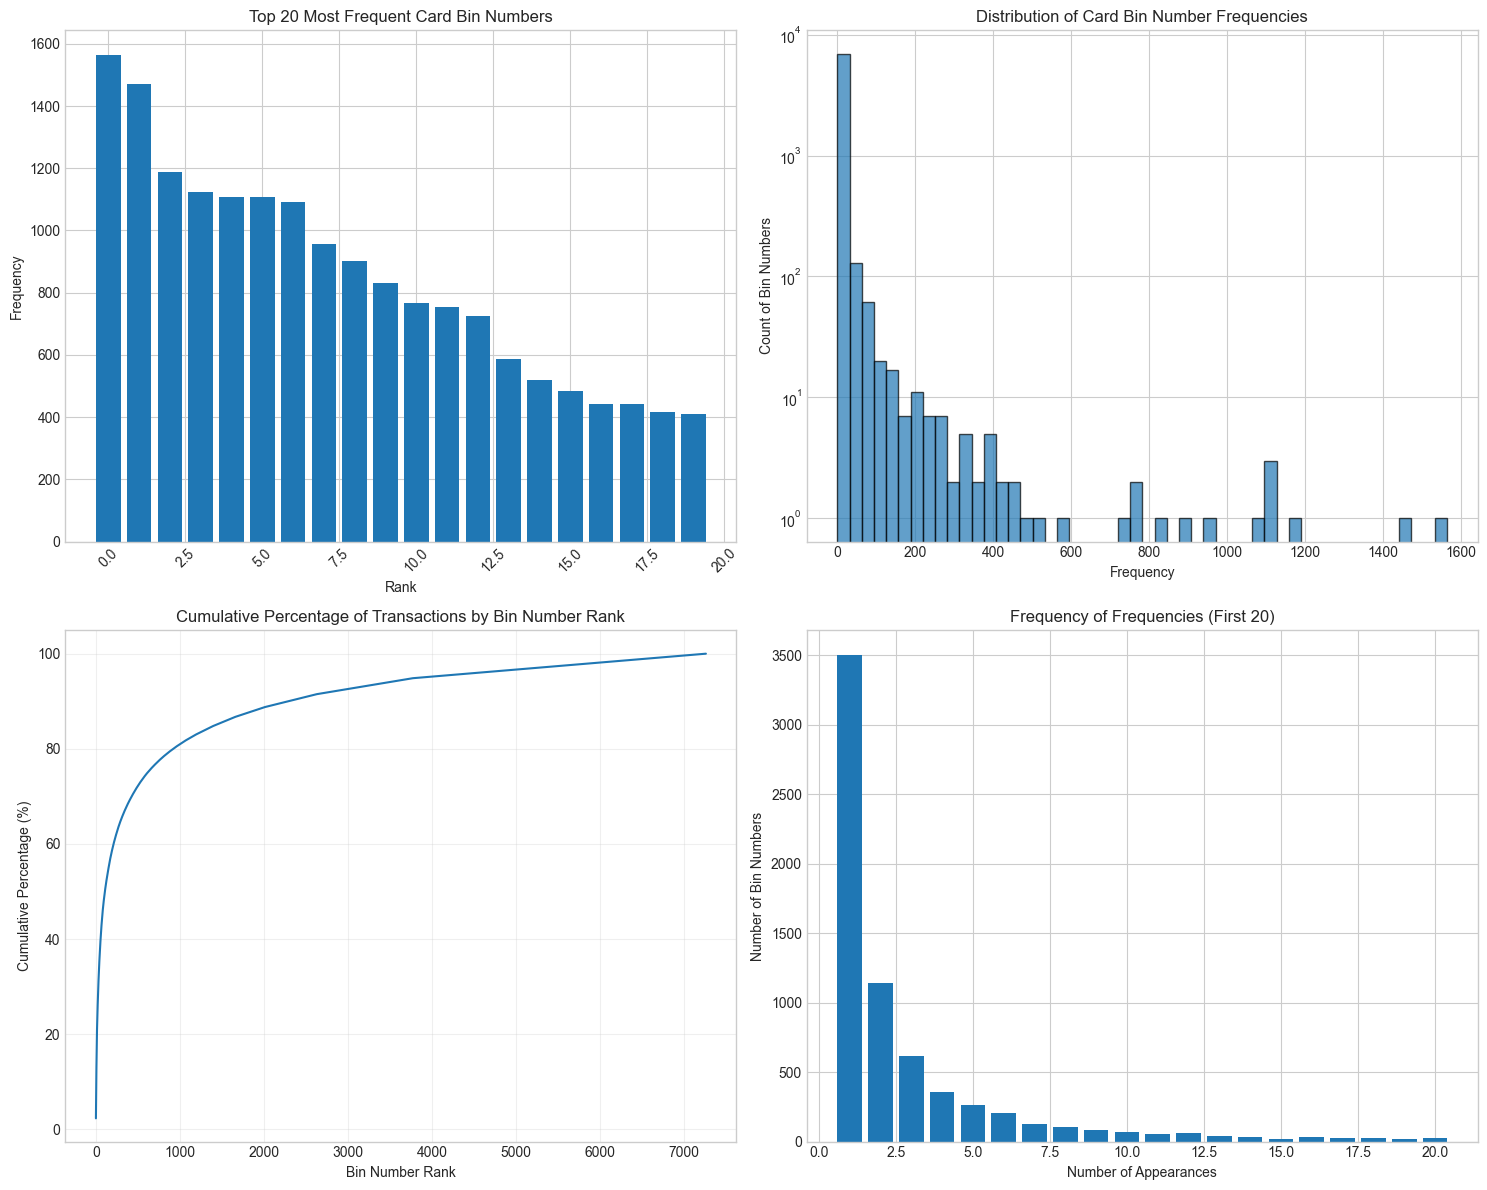


Coverage analysis:
Top 10 bin numbers cover: 16.76% of transactions
Top 50 bin numbers cover: 38.07% of transactions
Top 100 bin numbers cover: 48.92% of transactions
Top 500 bin numbers cover: 72.20% of transactions


In [165]:
# Create visualizations for card bin number frequency distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Top 20 most frequent bin numbers
axes[0, 0].bar(range(20), bin_number_counts.head(20).values)
axes[0, 0].set_title('Top 20 Most Frequent Card Bin Numbers')
axes[0, 0].set_xlabel('Rank')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribution of frequencies (log scale)
axes[0, 1].hist(bin_number_counts.values, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Card Bin Number Frequencies')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Count of Bin Numbers')
axes[0, 1].set_yscale('log')

# 3. Cumulative percentage of transactions
cumulative_pct = (bin_number_counts.cumsum() / bin_number_counts.sum() * 100)
axes[1, 0].plot(range(len(cumulative_pct)), cumulative_pct.values)
axes[1, 0].set_title('Cumulative Percentage of Transactions by Bin Number Rank')
axes[1, 0].set_xlabel('Bin Number Rank')
axes[1, 0].set_ylabel('Cumulative Percentage (%)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Frequency of frequencies (how many bin numbers appear X times)
freq_of_freq = bin_number_counts.value_counts().sort_index()
axes[1, 1].bar(freq_of_freq.index[:20], freq_of_freq.values[:20])
axes[1, 1].set_title('Frequency of Frequencies (First 20)')
axes[1, 1].set_xlabel('Number of Appearances')
axes[1, 1].set_ylabel('Number of Bin Numbers')

plt.tight_layout()
plt.show()

# Calculate what percentage of transactions are covered by top N bin numbers
top_10_pct = (bin_number_counts.head(10).sum() / bin_number_counts.sum() * 100)
top_50_pct = (bin_number_counts.head(50).sum() / bin_number_counts.sum() * 100)
top_100_pct = (bin_number_counts.head(100).sum() / bin_number_counts.sum() * 100)
top_500_pct = (bin_number_counts.head(500).sum() / bin_number_counts.sum() * 100)

print(f"\nCoverage analysis:")
print(f"Top 10 bin numbers cover: {top_10_pct:.2f}% of transactions")
print(f"Top 50 bin numbers cover: {top_50_pct:.2f}% of transactions") 
print(f"Top 100 bin numbers cover: {top_100_pct:.2f}% of transactions")
print(f"Top 500 bin numbers cover: {top_500_pct:.2f}% of transactions")

In [166]:
# Import the BIN database
bin_database = pd.read_csv("bin-list-data.csv")

print("BIN Database Info:")
print(f"Shape: {bin_database.shape}")
print(f"Columns: {list(bin_database.columns)}")

print("\nFirst few rows of BIN database:")
bin_database = bin_database[["BIN", "Issuer"]]
bin_database.head()

BIN Database Info:
Shape: (374788, 10)
Columns: ['BIN', 'Brand', 'Type', 'Category', 'Issuer', 'IssuerPhone', 'IssuerUrl', 'isoCode2', 'isoCode3', 'CountryName']

First few rows of BIN database:


,BIN,Issuer
0,2102,CHINA MERCHANTS BANK
1,2195,CHINA MERCHANTS BANK
2,2201,CHINA MERCHANTS BANK
3,2239,CHINA MERCHANTS BANK
4,2361,CHINA MERCHANTS BANK


In [167]:
# Get all unique BINs from our Decay_Data
unique_bins_decay = Decay_Data['card_bin_number'].unique()
print(f"Total unique BINs in Decay_Data: {len(unique_bins_decay)}")
print(f"Sample BINs from Decay_Data: {unique_bins_decay[:10]}")

# Convert BINs to string and get first 6 digits for matching
decay_bins_6digit = [str(bin_num)[:6] for bin_num in unique_bins_decay]
decay_bins_6digit_set = set(decay_bins_6digit)
print(f"\nUnique 6-digit BIN prefixes in Decay_Data: {len(decay_bins_6digit_set)}")

# Get BINs from the BIN database (assuming the column is named appropriately)
# First, let's see what BIN-related columns we have
print(f"\nBIN database columns: {list(bin_database.columns)}")

# Assuming the BIN column is named 'bin' or similar, convert to string for matching
bin_database_bins = bin_database.iloc[:, 0].astype(str)  # First column is likely the BIN
bin_database_bins_set = set(bin_database_bins)
print(f"Total BINs in BIN database: {len(bin_database_bins_set)}")

# Check matches
matched_bins = decay_bins_6digit_set.intersection(bin_database_bins_set)
unmatched_bins = decay_bins_6digit_set - bin_database_bins_set

print(f"\n=== MATCHING RESULTS ===")
print(f"BINs with matches: {len(matched_bins)}")
print(f"BINs without matches: {len(unmatched_bins)}")
print(f"Match rate: {len(matched_bins) / len(decay_bins_6digit_set) * 100:.2f}%")

print(f"\nSample matched BINs: {list(matched_bins)[:10]}")
print(f"Sample unmatched BINs: {list(unmatched_bins)[:10]}")

# Check how many transactions are covered by matched BINs
decay_data_with_6digit = Decay_Data.copy()
decay_data_with_6digit['bin_6digit'] = decay_data_with_6digit['card_bin_number'].astype(str).str[:6]
matched_transactions = decay_data_with_6digit[decay_data_with_6digit['bin_6digit'].isin(matched_bins)]
unmatched_transactions = decay_data_with_6digit[~decay_data_with_6digit['bin_6digit'].isin(matched_bins)]

print(f"\n=== TRANSACTION COVERAGE ===")
print(f"Transactions with matched BINs: {len(matched_transactions):,} ({len(matched_transactions)/len(Decay_Data)*100:.2f}%)")
print(f"Transactions with unmatched BINs: {len(unmatched_transactions):,} ({len(unmatched_transactions)/len(Decay_Data)*100:.2f}%)")

Total unique BINs in Decay_Data: 7262
Sample BINs from Decay_Data: [444796 401154 442326 510553 514616 516676 521333 526929 529149 539689]

Unique 6-digit BIN prefixes in Decay_Data: 7262

BIN database columns: ['BIN', 'Issuer']
Total BINs in BIN database: 374788

=== MATCHING RESULTS ===
BINs with matches: 7256
BINs without matches: 6
Match rate: 99.92%

Sample matched BINs: ['528445', '493751', '551128', '469049', '401162', '514022', '550866', '483488', '462694', '479125']
Sample unmatched BINs: ['534474', '512148', '514032', '559659', '517809', '521999']

=== TRANSACTION COVERAGE ===
Transactions with matched BINs: 67,675 (99.99%)
Transactions with unmatched BINs: 6 (0.01%)


BIN database columns:
0: BIN
1: Issuer
Using 'Issuer' as issuer column
Sample issuers: ['CHINA MERCHANTS BANK' 'SHIFT4 PAYMENTS' 'BANCO PAN' nan
 'BDO UNIBANK, INC.' 'TBI BANK' 'BANCO DE CREDITO ARGENTINO'
 'INDUSTRIAL AND COMMERCIAL BANK OF CHINA' 'CHINA CONSTRUCTION BANK'
 'BANCO PICHINCHA']

Created dictionary with 374788 BIN-to-issuer mappings

Issuer distribution:
Total unique issuers: 3182
Transactions with 'Others': 6 (0.01%)

Top 20 issuers:
issuer
CAPITAL ONE, NATIONAL ASSOCIATION         5641
JPMORGAN CHASE BANK N.A.                  3852
WELLS FARGO BANK, NATIONAL ASSOCIATION    3732
JPMORGAN CHASE BANK N.A. - DEBIT          3075
BANK OF AMERICA, NATIONAL ASSOCIATION     2027
THE BANCORP BANK, NATIONAL ASSOCIATION    1820
STRIDE BANK, NATIONAL ASSOCIATION         1705
CITIBANK N.A.                             1692
CREDIT ONE BANK, NATIONAL ASSOCIATION     1554
THE BANCORP BANK NATIONAL ASSOCIATION     1541
U.S. BANK NATIONAL ASSOCIATION-CREDIT     1496
NAVY FEDERAL CREDIT UN

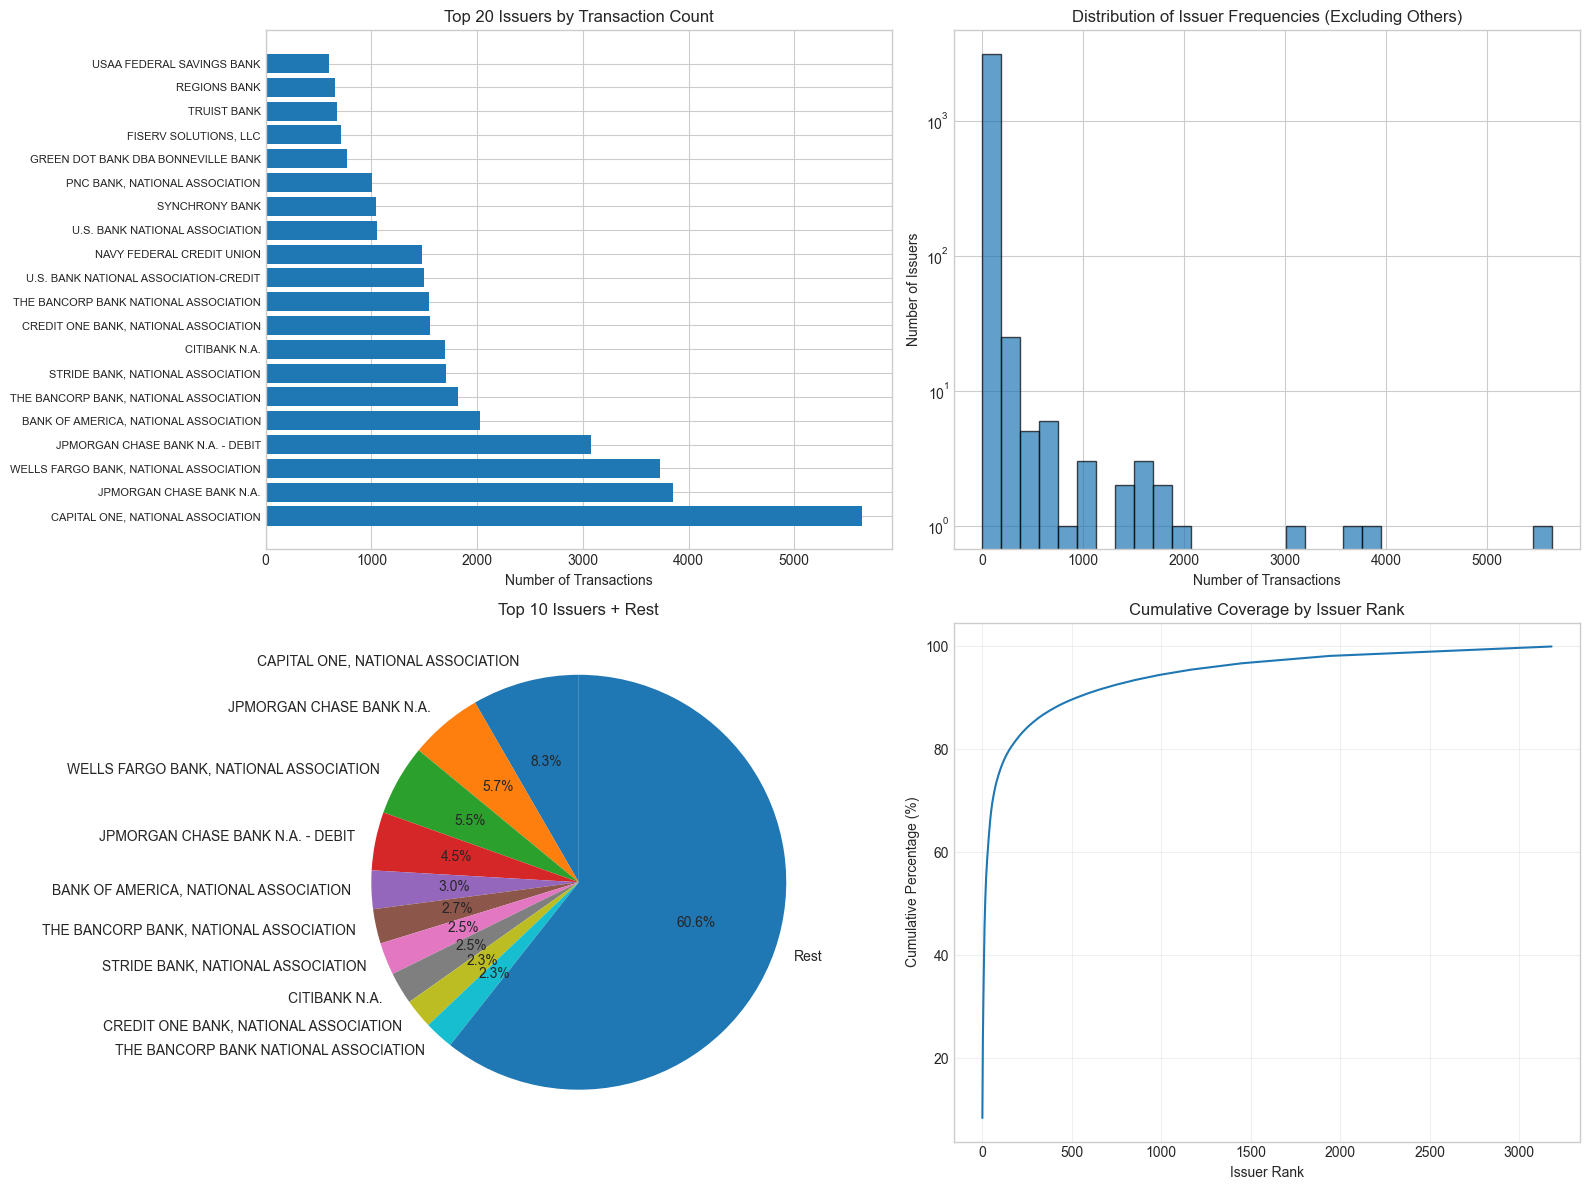


=== SUMMARY ===
Total unique issuers found: 3182
Top 10 issuers cover: 39.36% of transactions
Top 20 issuers cover: 53.37% of transactions
'Others' category: 0.01% of transactions


In [168]:
# Create dictionary mapping BINs to Issuers
bin_to_issuer_dict = {}

# First, let's identify the correct column name for issuer in the BIN database
print("BIN database columns:")
for i, col in enumerate(bin_database.columns):
    print(f"{i}: {col}")

# Assuming the issuer column contains bank/issuer information (adjust column name as needed)
# Let's check what the issuer column is called - common names: 'issuer', 'bank', 'issuer_name', 'brand'
issuer_column = None
for col in bin_database.columns:
    if any(keyword in col.lower() for keyword in ['issuer', 'bank', 'brand', 'institution']):
        issuer_column = col
        break

if issuer_column is None:
    # If no obvious issuer column, use the second column (assuming first is BIN, second is issuer)
    issuer_column = bin_database.columns[1]

print(f"Using '{issuer_column}' as issuer column")
print(f"Sample issuers: {bin_database[issuer_column].unique()[:10]}")

# Create the mapping dictionary
bin_col = bin_database.columns[0]  # First column is the BIN
for _, row in bin_database.iterrows():
    bin_num = str(row[bin_col])
    issuer = row[issuer_column]
    bin_to_issuer_dict[bin_num] = issuer if pd.notna(issuer) else 'Unknown'

print(f"\nCreated dictionary with {len(bin_to_issuer_dict)} BIN-to-issuer mappings")

# Map our Decay_Data BINs to issuers
def get_issuer_from_bin(bin_number):
    bin_6digit = str(bin_number)[:6]
    return bin_to_issuer_dict.get(bin_6digit, 'Others')

# Apply the mapping
Decay_Data['issuer'] = Decay_Data['card_bin_number'].apply(get_issuer_from_bin)

# Count issuers
issuer_counts = Decay_Data['issuer'].value_counts()
print(f"\nIssuer distribution:")
print(f"Total unique issuers: {len(issuer_counts)}")
print(f"Transactions with 'Others': {issuer_counts.get('Others', 0):,} ({issuer_counts.get('Others', 0)/len(Decay_Data)*100:.2f}%)")
print(f"\nTop 20 issuers:")
print(issuer_counts.head(20))

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 20 issuers bar chart
top_20_issuers = issuer_counts.head(20)
axes[0, 0].barh(range(len(top_20_issuers)), top_20_issuers.values)
axes[0, 0].set_yticks(range(len(top_20_issuers)))
axes[0, 0].set_yticklabels(top_20_issuers.index, fontsize=8)
axes[0, 0].set_title('Top 20 Issuers by Transaction Count')
axes[0, 0].set_xlabel('Number of Transactions')

# 2. Distribution of issuer frequencies (excluding 'Others')
issuer_counts_no_others = issuer_counts[issuer_counts.index != 'Others']
axes[0, 1].hist(issuer_counts_no_others.values, bins=30, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Issuer Frequencies (Excluding Others)')
axes[0, 1].set_xlabel('Number of Transactions')
axes[0, 1].set_ylabel('Number of Issuers')
axes[0, 1].set_yscale('log')

# 3. Pie chart of top 10 + Others
top_10_issuers = issuer_counts.head(10)
other_sum = issuer_counts.iloc[10:].sum()
pie_data = list(top_10_issuers.values) + [other_sum]
pie_labels = list(top_10_issuers.index) + ['Rest']
axes[1, 0].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Top 10 Issuers + Rest')

# 4. Cumulative percentage coverage
cumulative_pct = (issuer_counts.cumsum() / issuer_counts.sum() * 100)
axes[1, 1].plot(range(len(cumulative_pct)), cumulative_pct.values)
axes[1, 1].set_title('Cumulative Coverage by Issuer Rank')
axes[1, 1].set_xlabel('Issuer Rank')
axes[1, 1].set_ylabel('Cumulative Percentage (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n=== SUMMARY ===")
print(f"Total unique issuers found: {len(issuer_counts)}")
print(f"Top 10 issuers cover: {issuer_counts.head(10).sum() / len(Decay_Data) * 100:.2f}% of transactions")
print(f"Top 20 issuers cover: {issuer_counts.head(20).sum() / len(Decay_Data) * 100:.2f}% of transactions")
print(f"'Others' category: {issuer_counts.get('Others', 0) / len(Decay_Data) * 100:.2f}% of transactions")

C:\Users\mmsou\AppData\Local\Temp\ipykernel_36992\1936436925.py:105: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\mmsou\AppData\Local\Temp\ipykernel_36992\1936436925.py:105: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\mmsou\AppData\Local\Temp\ipykernel_36992\1936436925.py:105: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\mmsou\AppData\Local\Temp\ipykernel_36992\1936436925.py:105: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\mmsou\AppData\Local\Temp\ipykernel_36992\1936436925.py:105: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\mmsou\

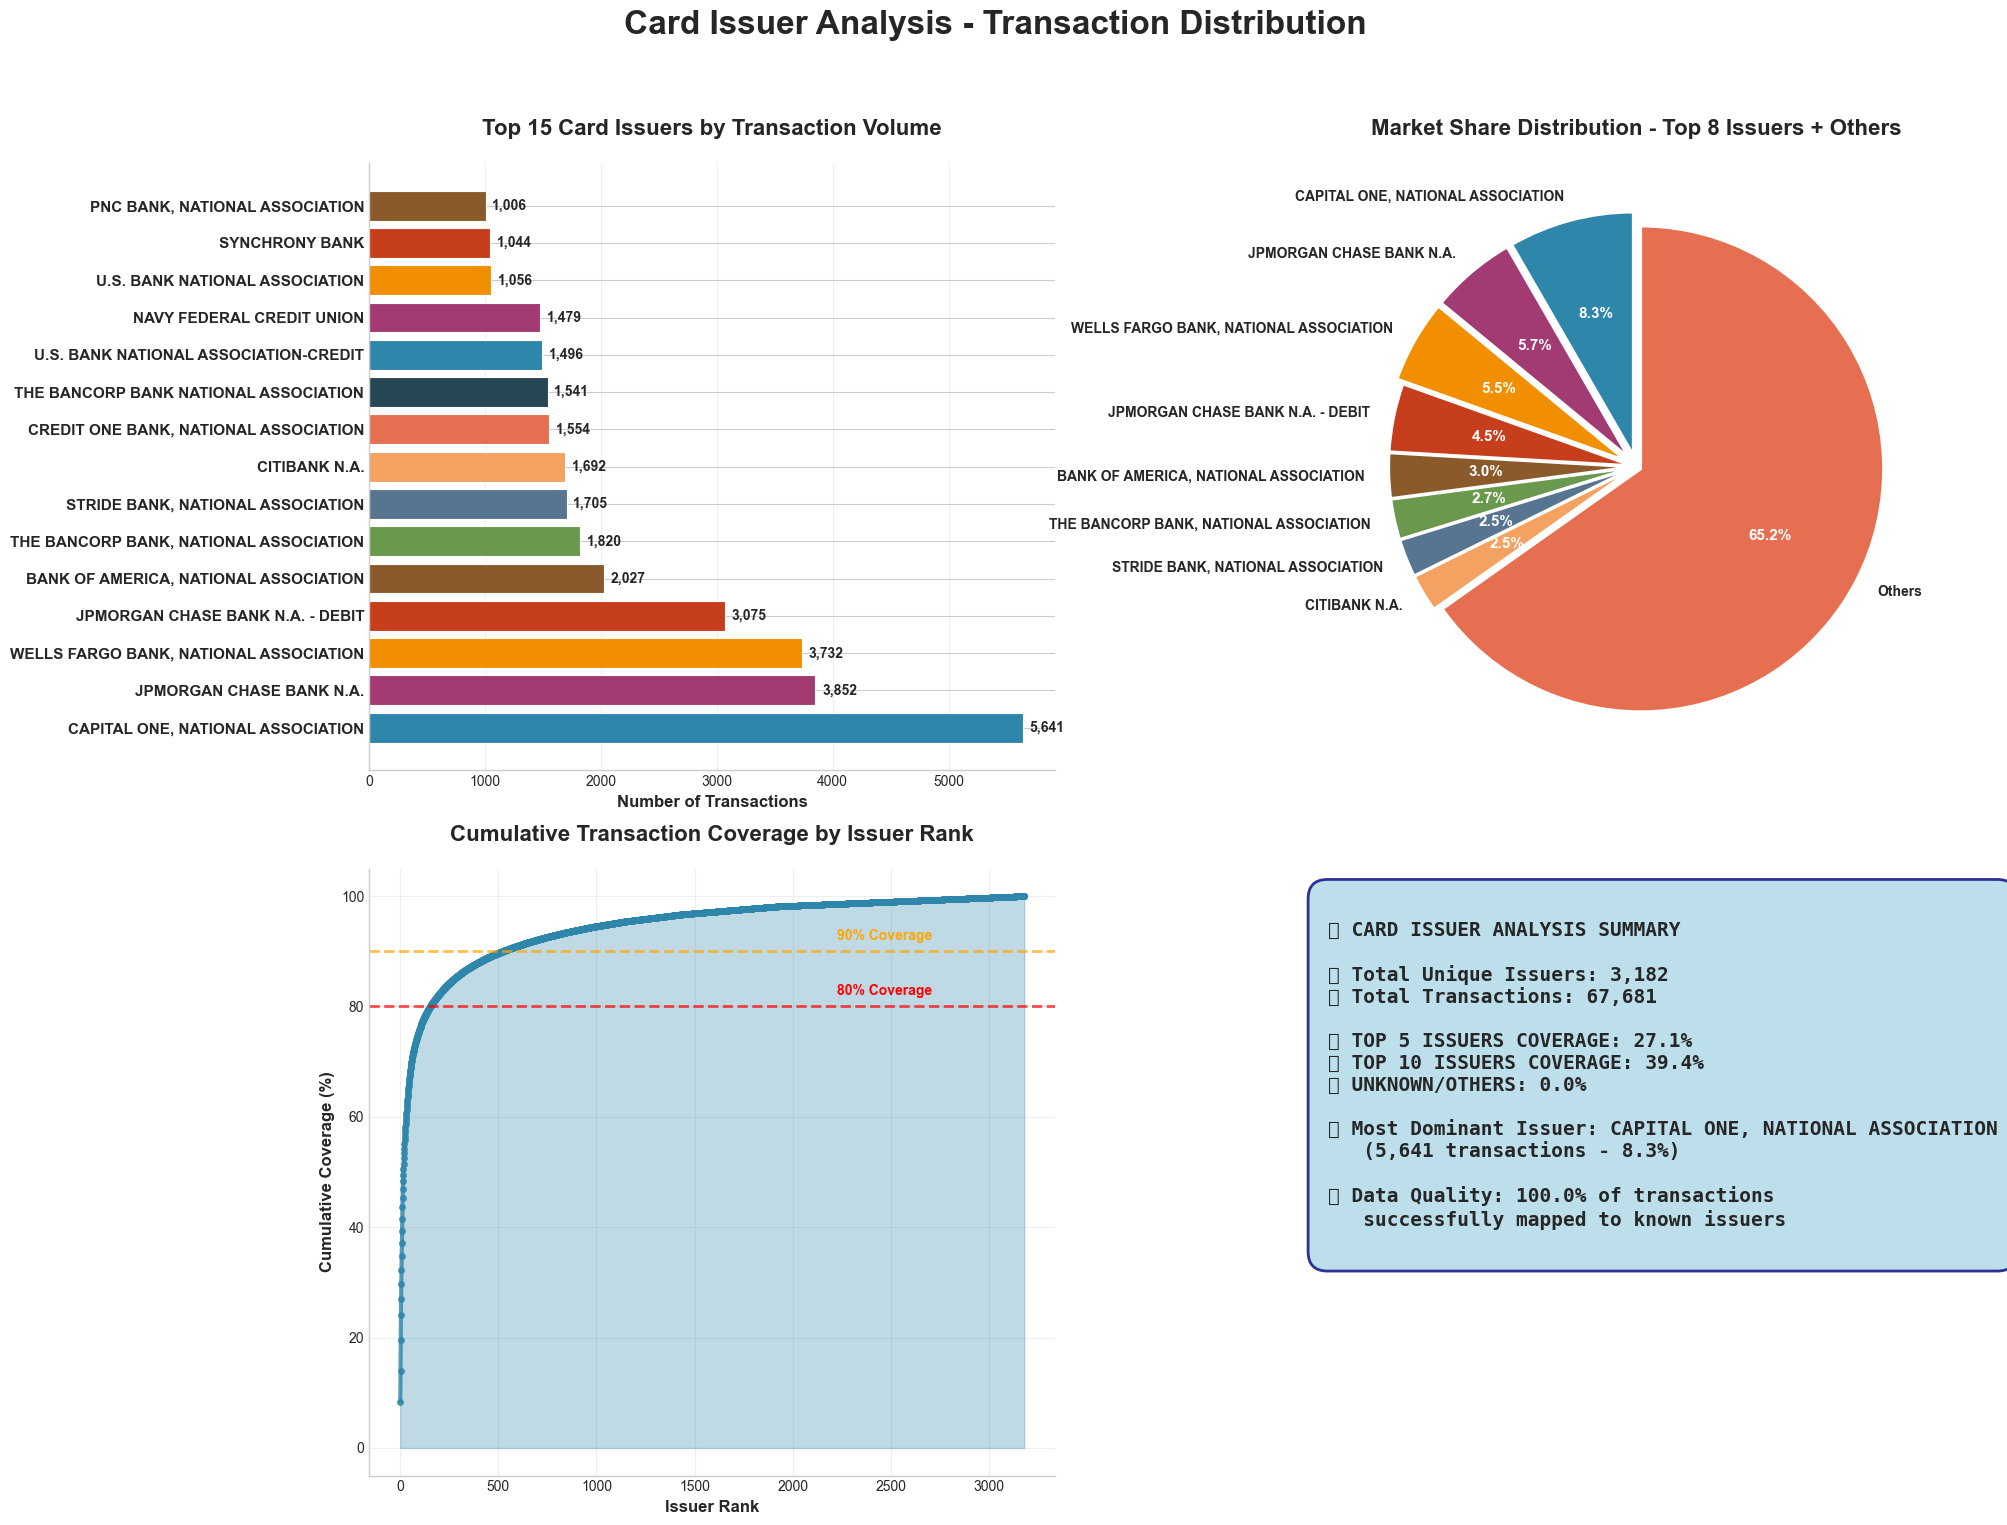

🏦 EXECUTIVE SUMMARY - CARD ISSUER DISTRIBUTION
📊 Dataset Overview:
   • Total Transactions: 67,681
   • Unique Card Issuers: 3182
   • Data Completeness: 100.0%

💼 Market Concentration:
   • Top 3 Issuers: 19.5% of transactions
   • Top 5 Issuers: 27.1% of transactions
   • Top 10 Issuers: 39.4% of transactions

🏆 Leading Issuers:
   1. CAPITAL ONE, NATIONAL ASSOCIATION: 5,641 transactions (8.3%)
   2. JPMORGAN CHASE BANK N.A.: 3,852 transactions (5.7%)
   3. WELLS FARGO BANK, NATIONAL ASSOCIATION: 3,732 transactions (5.5%)
   4. JPMORGAN CHASE BANK N.A. - DEBIT: 3,075 transactions (4.5%)
   5. BANK OF AMERICA, NATIONAL ASSOCIATION: 2,027 transactions (3.0%)


In [169]:
# Create professional-looking visualizations for client presentation
plt.style.use('seaborn-v0_8-whitegrid')
colors = plt.cm.Set3(np.linspace(0, 1, 20))
client_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#8B5A2B', '#6A994E', '#577590', '#F4A261', '#E76F51', '#264653']

fig = plt.figure(figsize=(20, 16))
fig.suptitle('Card Issuer Analysis - Transaction Distribution', fontsize=24, fontweight='bold', y=0.98)

# 1. Professional horizontal bar chart for top 15 issuers
ax1 = plt.subplot(2, 2, 1)
top_15_issuers = issuer_counts.head(15)
bars = ax1.barh(range(len(top_15_issuers)), top_15_issuers.values, 
                color=client_colors[:len(top_15_issuers)], edgecolor='white', linewidth=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_15_issuers.values)):
    ax1.text(value + max(top_15_issuers.values) * 0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:,}', ha='left', va='center', fontweight='bold', fontsize=10)

ax1.set_yticks(range(len(top_15_issuers)))
ax1.set_yticklabels(top_15_issuers.index, fontsize=11, fontweight='bold')
ax1.set_title('Top 15 Card Issuers by Transaction Volume', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Number of Transactions', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 2. Enhanced pie chart with better styling
ax2 = plt.subplot(2, 2, 2)
top_8_issuers = issuer_counts.head(8)
other_sum = issuer_counts.iloc[8:].sum()
pie_data = list(top_8_issuers.values) + [other_sum]
pie_labels = list(top_8_issuers.index) + ['Others']

# Create exploded pie chart
explode = [0.05 if i < 3 else 0.02 for i in range(len(pie_data))]
wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                   startangle=90, explode=explode,
                                   colors=client_colors + ['#cccccc'],
                                   textprops={'fontsize': 10, 'fontweight': 'bold'},
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Enhance text appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax2.set_title('Market Share Distribution - Top 8 Issuers + Others', 
              fontsize=16, fontweight='bold', pad=20)

# 3. Professional cumulative coverage chart
ax3 = plt.subplot(2, 2, 3)
cumulative_pct = (issuer_counts.cumsum() / issuer_counts.sum() * 100)
ax3.plot(range(len(cumulative_pct)), cumulative_pct.values, 
         color='#2E86AB', linewidth=3, marker='o', markersize=4, alpha=0.8)
ax3.fill_between(range(len(cumulative_pct)), cumulative_pct.values, alpha=0.3, color='#2E86AB')

# Add key milestone lines
ax3.axhline(y=80, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax3.axhline(y=90, color='orange', linestyle='--', alpha=0.7, linewidth=2)
ax3.text(len(cumulative_pct)*0.7, 82, '80% Coverage', fontsize=10, fontweight='bold', color='red')
ax3.text(len(cumulative_pct)*0.7, 92, '90% Coverage', fontsize=10, fontweight='bold', color='orange')

ax3.set_title('Cumulative Transaction Coverage by Issuer Rank', fontsize=16, fontweight='bold', pad=20)
ax3.set_xlabel('Issuer Rank', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cumulative Coverage (%)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# 4. Enhanced summary statistics box
ax4 = plt.subplot(2, 2, 4)
ax4.axis('off')

# Create summary statistics
total_issuers = len(issuer_counts)
top_5_coverage = issuer_counts.head(5).sum() / len(Decay_Data) * 100
top_10_coverage = issuer_counts.head(10).sum() / len(Decay_Data) * 100
others_pct = issuer_counts.get('Others', 0) / len(Decay_Data) * 100

# Create a nice summary box
summary_text = f"""
📊 CARD ISSUER ANALYSIS SUMMARY

🏦 Total Unique Issuers: {total_issuers:,}
📈 Total Transactions: {len(Decay_Data):,}

🥇 TOP 5 ISSUERS COVERAGE: {top_5_coverage:.1f}%
🏆 TOP 10 ISSUERS COVERAGE: {top_10_coverage:.1f}%
❓ UNKNOWN/OTHERS: {others_pct:.1f}%

💳 Most Dominant Issuer: {issuer_counts.index[0]}
   ({issuer_counts.iloc[0]:,} transactions - {issuer_counts.iloc[0]/len(Decay_Data)*100:.1f}%)

🔍 Data Quality: {100-others_pct:.1f}% of transactions 
   successfully mapped to known issuers
"""

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=14,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=1", 
         facecolor='lightblue', alpha=0.8, edgecolor='navy', linewidth=2),
         fontfamily='monospace', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Additional client-ready summary table
print("="*80)
print("🏦 EXECUTIVE SUMMARY - CARD ISSUER DISTRIBUTION")
print("="*80)
print(f"📊 Dataset Overview:")
print(f"   • Total Transactions: {len(Decay_Data):,}")
print(f"   • Unique Card Issuers: {total_issuers}")
print(f"   • Data Completeness: {100-others_pct:.1f}%")
print(f"\n💼 Market Concentration:")
print(f"   • Top 3 Issuers: {issuer_counts.head(3).sum()/len(Decay_Data)*100:.1f}% of transactions")
print(f"   • Top 5 Issuers: {top_5_coverage:.1f}% of transactions")
print(f"   • Top 10 Issuers: {top_10_coverage:.1f}% of transactions")
print(f"\n🏆 Leading Issuers:")
for i, (issuer, count) in enumerate(issuer_counts.head(5).items(), 1):
    print(f"   {i}. {issuer}: {count:,} transactions ({count/len(Decay_Data)*100:.1f}%)")
print("="*80)

### Now we will have to do add in the Bank Issuer column in the Decay_Data so that we can start having this

In [170]:
bin_database.head()

,BIN,Issuer
0,2102,CHINA MERCHANTS BANK
1,2195,CHINA MERCHANTS BANK
2,2201,CHINA MERCHANTS BANK
3,2239,CHINA MERCHANTS BANK
4,2361,CHINA MERCHANTS BANK


In [171]:
bin_database_dict = {}

# Unique BINs from Decay_Data 
unique_bins = Decay_Data['card_bin_number'].unique()

bin_database = bin_database[bin_database['BIN'].isin(unique_bins)]
print("The length of the bin_database is", bin_database.shape)
print("The number of unique BINs in the bin_database is", len(bin_database['BIN'].unique()))

for row in bin_database.itertuples(index=True):
    bin_database_dict[row.BIN] = row.Issuer


bin_database_dict


The length of the bin_database is (7256, 2)
The number of unique BINs in the bin_database is 7256


{222222: nan,
 222300: nan,
 223019: 'COMPUTER SERVICES, INC.',
 227406: nan,
 227466: nan,
 231411: nan,
 232099: nan,
 240002: 'ORBITALL SERVICOS E PROCESSAMENTO DE MEIOS DE PAGAMENTO LTDA',
 240046: nan,
 240975: nan,
 246478: nan,
 247536: nan,
 249420: nan,
 250836: nan,
 251333: nan,
 252133: nan,
 253658: nan,
 253704: nan,
 256900: nan,
 262345: nan,
 268426: nan,
 269103: nan,
 271796: 'BANGOR SAVINGS BANK',
 400002: 'RIVER VALLEY CREDIT UNION',
 400005: 'LEWIS & CLARK BANK',
 400011: 'UNIVERSITY FIRST FEDERAL CREDIT UNION',
 400021: 'INTL HDQTRS-CENTER OWNED',
 400022: 'NAVY FEDERAL CREDIT UNION',
 400023: 'NAVY FEDERAL CREDIT UNION',
 400025: 'INTL HDQTRS-CENTER OWNED',
 400029: 'IOWA STATE BANK',
 400056: 'INTL HDQTRS-CENTER OWNED',
 400066: 'INTERCONTINENTAL BANK PLC',
 400088: nan,
 400095: 'DEPARTMENT OF COMMERCE FEDERAL CREDIT UNION',
 400107: 'BANCO DO BRASIL, S.A.',
 400113: 'THE PAULS VALLEY NATIONAL BANK',
 400125: "CITIZENS' BANK & TRUST CO.",
 400139: 'VISA EUROPE

In [172]:
# Create bank_issuer column by looping over Decay_Data and mapping bin_database_dict
print("=== CREATING BANK_ISSUER COLUMN USING BIN DATABASE MAPPING ===")

# Initialize the bank_issuer column with default value 'other_bank'
Decay_Data['bank_issuer'] = 'other_bank'

print("Mapping BIN numbers to bank issuers using bin_database_dict...")
print(f"Starting loop over {len(Decay_Data):,} rows...")

# Loop through the Decay_Data dataframe and map BIN numbers to bank issuers
for index, row in Decay_Data.iterrows():
    bin_number = row['card_bin_number']
    
    # Check if this BIN exists in our bin_database_dict
    if bin_number in bin_database_dict:
        Decay_Data.at[index, 'bank_issuer'] = bin_database_dict[bin_number]
    # If no match found, it remains 'other_bank' (default value)
    
    # Progress indicator for large datasets
    if (index + 1) % 10000 == 0:
        print(f"Processed {index + 1:,} rows...")

print(f"Completed mapping for {len(Decay_Data):,} rows")

# Display results
bank_issuer_counts = Decay_Data['bank_issuer'].value_counts()
print(f"\n=== BANK_ISSUER MAPPING RESULTS ===")
print(f"Total unique bank issuers: {len(bank_issuer_counts)}")
matched_count = len(Decay_Data) - bank_issuer_counts.get('other_bank', 0)
print(f"Matched transactions: {matched_count:,} ({matched_count/len(Decay_Data)*100:.2f}%)")
print(f"Unmatched transactions (other_bank): {bank_issuer_counts.get('other_bank', 0):,} ({bank_issuer_counts.get('other_bank', 0)/len(Decay_Data)*100:.2f}%)")

print("\nTop 15 bank issuers:")
print(bank_issuer_counts.head(15))

# Display sample rows to verify the mapping
print("\nSample rows showing BIN number and bank_issuer:")
sample_cols = ['card_bin_number', 'bank_issuer']
print(Decay_Data[sample_cols].head(10))

# Save the updated dataframe
Decay_Data.to_csv("Decay_Data.csv", index=False)
print(f"\n✅ Updated Decay_Data saved to 'Decay_Data.csv' with bank_issuer column added")

=== CREATING BANK_ISSUER COLUMN USING BIN DATABASE MAPPING ===
Mapping BIN numbers to bank issuers using bin_database_dict...
Starting loop over 67,681 rows...
Processed 10,000 rows...
Processed 20,000 rows...
Processed 30,000 rows...
Processed 40,000 rows...
Processed 50,000 rows...
Processed 60,000 rows...
Completed mapping for 67,681 rows

=== BANK_ISSUER MAPPING RESULTS ===
Total unique bank issuers: 3181
Matched transactions: 67,675 (99.99%)
Unmatched transactions (other_bank): 6 (0.01%)

Top 15 bank issuers:
bank_issuer
CAPITAL ONE, NATIONAL ASSOCIATION         5641
JPMORGAN CHASE BANK N.A.                  3852
WELLS FARGO BANK, NATIONAL ASSOCIATION    3732
JPMORGAN CHASE BANK N.A. - DEBIT          3075
BANK OF AMERICA, NATIONAL ASSOCIATION     2027
THE BANCORP BANK, NATIONAL ASSOCIATION    1820
STRIDE BANK, NATIONAL ASSOCIATION         1705
CITIBANK N.A.                             1692
CREDIT ONE BANK, NATIONAL ASSOCIATION     1554
THE BANCORP BANK NATIONAL ASSOCIATION     154

In [173]:
Decay_Data["bank_issuer"] = Decay_Data["bank_issuer"].astype(str)
Decay_Data["bank_issuer"]

dict_bank_issuer = {}
for row in Decay_Data.itertuples(index=True):
    bank_issuer = row.bank_issuer
    if bank_issuer not in dict_bank_issuer:
        dict_bank_issuer[bank_issuer] = 1
    else:
        dict_bank_issuer[bank_issuer] += 1
        
# Sort dictionary by values in descending order and get top 10
dict_bank_issuer = dict(sorted(dict_bank_issuer.items(), key=lambda x: x[1], reverse=True)[:10])
dict_bank_issuer

# now we need to iteate over the Decay_Data and for ech cell in teh bank_issuer column, if its not one of the keys pf the dict we need to swap it for OTHER 
for row in Decay_Data.itertuples(index=True):
    bank_issuer = row.bank_issuer
    if bank_issuer not in dict_bank_issuer:
        Decay_Data.at[row.Index, "bank_issuer"] = "OTHER"
    else:
        Decay_Data.at[row.Index, "bank_issuer"] = bank_issuer

Decay_Data["bank_issuer"].value_counts()


bank_issuer
OTHER                                     41042
CAPITAL ONE, NATIONAL ASSOCIATION          5641
JPMORGAN CHASE BANK N.A.                   3852
WELLS FARGO BANK, NATIONAL ASSOCIATION     3732
JPMORGAN CHASE BANK N.A. - DEBIT           3075
BANK OF AMERICA, NATIONAL ASSOCIATION      2027
THE BANCORP BANK, NATIONAL ASSOCIATION     1820
STRIDE BANK, NATIONAL ASSOCIATION          1705
CITIBANK N.A.                              1692
CREDIT ONE BANK, NATIONAL ASSOCIATION      1554
THE BANCORP BANK NATIONAL ASSOCIATION      1541
Name: count, dtype: int64

In [174]:
Decay_Data.drop(columns=["issuer"], inplace=True)# Drop the BIN column 
Decay_Data.drop(columns=["card_bin_number"], inplace=True)

In [175]:
# Get unique values from bank_issuer column
unique_bank_issuers = Decay_Data['bank_issuer'].unique()
print("Unique bank issuers in dataset:")
print(unique_bank_issuers)
print(f"\nTotal unique bank issuers: {len(unique_bank_issuers)}")

# Convert to set for easier processing
set_bank_issuers = set(unique_bank_issuers)
print(f"\nBank issuers as set: {set_bank_issuers}")

# Add all unique bank issuers as new columns with bankissuer_ prefix
for bank_issuer in set_bank_issuers:
    # Clean bank_issuer name to make it a valid column name
    bankissuer_col_name = f"bankissuer_{bank_issuer.replace(' ', '_').replace(',', '').replace('.', '').lower()}"
    Decay_Data[bankissuer_col_name] = 0

print(f"\nAdded {len(set_bank_issuers)} bankissuer columns to Decay_Data")
print("New bankissuer columns:", [col for col in Decay_Data.columns if col.startswith('bankissuer_')])

# Create dictionary to map row indices to bank_issuer values
bankissuer_dict = {}

for row in Decay_Data.itertuples(index=True):
    row_index = row.Index
    bank_issuer_value = row.bank_issuer
    # Clean bank_issuer name to match column naming convention
    bankissuer_col_name = f"bankissuer_{bank_issuer_value.replace(' ', '_').replace(',', '').replace('.', '').lower()}"
    bankissuer_dict[row_index] = bankissuer_col_name

print(f"\nCreated bankissuer dictionary with {len(bankissuer_dict)} entries")

# Apply the one-hot encoding
for row_index, bankissuer_col_name in bankissuer_dict.items():
    if bankissuer_col_name in Decay_Data.columns:
        Decay_Data.loc[row_index, bankissuer_col_name] = 1
    else:
        print(f"Warning: Column {bankissuer_col_name} not found in Decay_Data")

print("Completed one-hot encoding for bank_issuer column")

# Verify the encoding
bankissuer_cols = [col for col in Decay_Data.columns if col.startswith('bankissuer_')]
bankissuer_sums = Decay_Data[bankissuer_cols].sum(axis=1)

print(f"\nVerification - Bank issuer sums for each row:")
print(f"All rows have exactly one bank issuer: {(bankissuer_sums == 1).all()}")

# Drop the original bank_issuer column since we now have one-hot encoded versions
Decay_Data.drop(columns=["bank_issuer"], inplace=True)
print("\nDropped original bank_issuer column")

Unique bank issuers in dataset:
['CREDIT ONE BANK, NATIONAL ASSOCIATION' 'OTHER'
 'CAPITAL ONE, NATIONAL ASSOCIATION' 'JPMORGAN CHASE BANK N.A.'
 'THE BANCORP BANK, NATIONAL ASSOCIATION'
 'WELLS FARGO BANK, NATIONAL ASSOCIATION'
 'STRIDE BANK, NATIONAL ASSOCIATION' 'CITIBANK N.A.'
 'THE BANCORP BANK NATIONAL ASSOCIATION'
 'BANK OF AMERICA, NATIONAL ASSOCIATION'
 'JPMORGAN CHASE BANK N.A. - DEBIT']

Total unique bank issuers: 11

Bank issuers as set: {'WELLS FARGO BANK, NATIONAL ASSOCIATION', 'CITIBANK N.A.', 'CAPITAL ONE, NATIONAL ASSOCIATION', 'CREDIT ONE BANK, NATIONAL ASSOCIATION', 'JPMORGAN CHASE BANK N.A. - DEBIT', 'STRIDE BANK, NATIONAL ASSOCIATION', 'BANK OF AMERICA, NATIONAL ASSOCIATION', 'OTHER', 'THE BANCORP BANK NATIONAL ASSOCIATION', 'JPMORGAN CHASE BANK N.A.', 'THE BANCORP BANK, NATIONAL ASSOCIATION'}

Added 11 bankissuer columns to Decay_Data
New bankissuer columns: ['bankissuer_wells_fargo_bank_national_association', 'bankissuer_citibank_na', 'bankissuer_capital_one_nati

In [176]:
# Get all bankissuer columns
bankissuer_cols = [col for col in Decay_Data.columns if col.startswith('bankissuer_')]

# Sum up all the ones in bankissuer columns
total_bankissuer_ones = Decay_Data[bankissuer_cols].sum().sum()

# Get total number of rows
total_rows = len(Decay_Data)

print(f"Total ones in bankissuer columns: {total_bankissuer_ones}")
print(f"Total rows in Decay_Data: {total_rows}")
print(f"Numbers match: {total_bankissuer_ones == total_rows}")


Total ones in bankissuer columns: 67681
Total rows in Decay_Data: 67681
Numbers match: True


### **2.7) State of purchase**

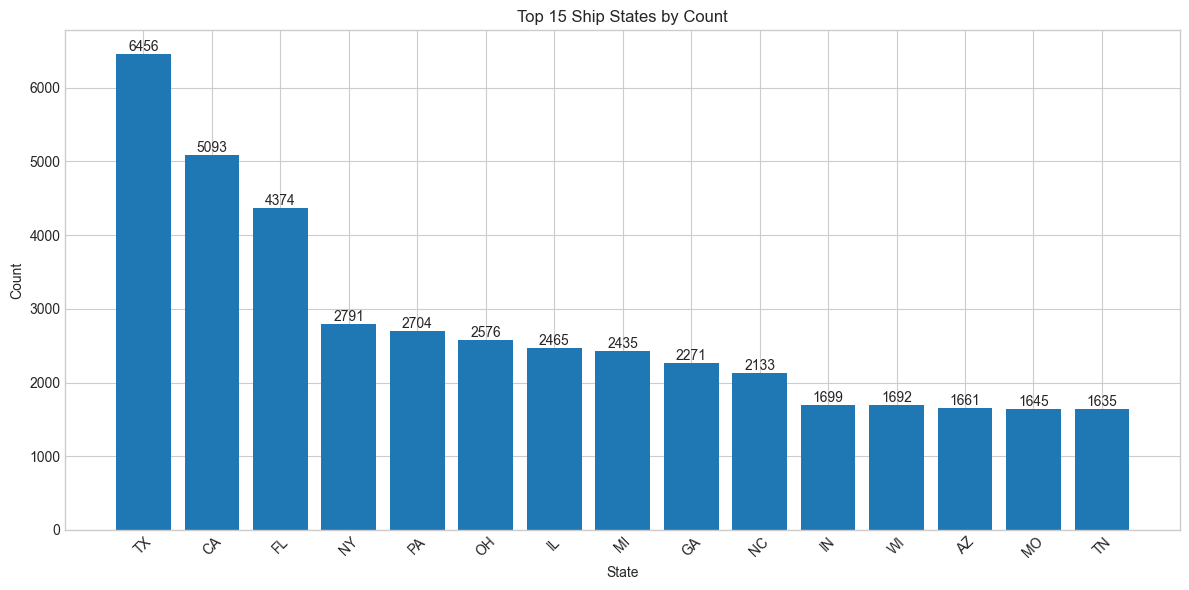

{'TX': 6456,
 'CA': 5093,
 'FL': 4374,
 'NY': 2791,
 'PA': 2704,
 'OH': 2576,
 'IL': 2465,
 'MI': 2435,
 'GA': 2271,
 'NC': 2133,
 'IN': 1699,
 'WI': 1692,
 'AZ': 1661,
 'MO': 1645,
 'TN': 1635}

In [177]:
# Count occurrences of each ship state
dict_ship_state = {}
for row in Decay_Data.itertuples(index=True):
    ship_state = row.ship_state
    if ship_state not in dict_ship_state:
        dict_ship_state[ship_state] = 1
    else:
        dict_ship_state[ship_state] += 1
        
# Sort dictionary by values in descending order and get top 10
dict_ship_state = dict(sorted(dict_ship_state.items(), key=lambda x: x[1], reverse=True)[:15])

# Create bar chart
plt.figure(figsize=(12,6))
plt.bar(dict_ship_state.keys(), dict_ship_state.values())
plt.title('Top 15 Ship States by Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(dict_ship_state.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print dictionary
dict_ship_state

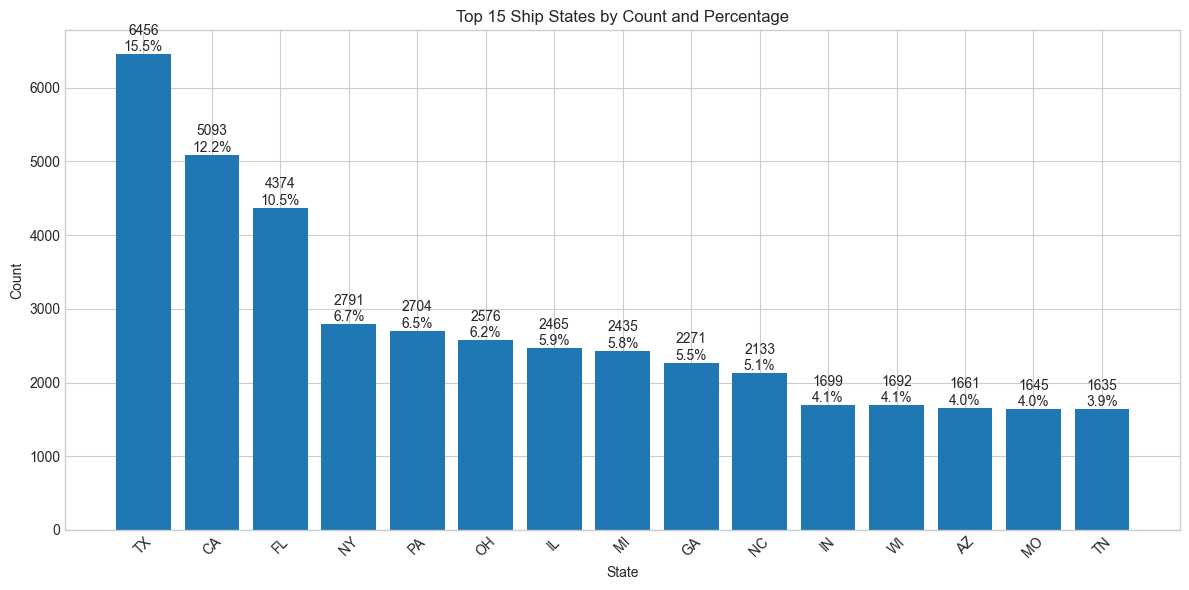

{'TX': {'count': 6456, 'percentage': '15.5%'},
 'CA': {'count': 5093, 'percentage': '12.2%'},
 'FL': {'count': 4374, 'percentage': '10.5%'},
 'NY': {'count': 2791, 'percentage': '6.7%'},
 'PA': {'count': 2704, 'percentage': '6.5%'},
 'OH': {'count': 2576, 'percentage': '6.2%'},
 'IL': {'count': 2465, 'percentage': '5.9%'},
 'MI': {'count': 2435, 'percentage': '5.8%'},
 'GA': {'count': 2271, 'percentage': '5.5%'},
 'NC': {'count': 2133, 'percentage': '5.1%'},
 'IN': {'count': 1699, 'percentage': '4.1%'},
 'WI': {'count': 1692, 'percentage': '4.1%'},
 'AZ': {'count': 1661, 'percentage': '4.0%'},
 'MO': {'count': 1645, 'percentage': '4.0%'},
 'TN': {'count': 1635, 'percentage': '3.9%'}}

In [178]:
# Calculate total transactions
total_transactions = sum(dict_ship_state.values())

# Create dictionary with state counts and percentages
dict_ship_state_with_pct = {}
for state, count in dict_ship_state.items():
    pct = (count / total_transactions) * 100
    dict_ship_state_with_pct[state] = {'count': count, 'percentage': f'{pct:.1f}%'}

# Create bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(dict_ship_state.keys(), dict_ship_state.values())
plt.title('Top 15 Ship States by Count and Percentage')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value and percentage labels on top of each bar
for i, (state, data) in enumerate(dict_ship_state_with_pct.items()):
    count = data['count']
    pct = data['percentage']
    plt.text(i, count, f'{count}\n{pct}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print dictionary with percentages
dict_ship_state_with_pct


In [179]:
# Update ship_state column: replace values not in dict_ship_state keys with "OTHER"
print("Before update:")
print(f"Unique ship_state values: {len(Decay_Data['ship_state'].unique())}")
print(f"Values in dict_ship_state: {list(dict_ship_state.keys())}")

# Count values before update
before_counts = Decay_Data['ship_state'].value_counts()
print(f"Sample current values: {before_counts.head()}")

# Update ship_state values
for index, row in Decay_Data.iterrows():
    ship_state_value = row['ship_state']
    if ship_state_value not in dict_ship_state:
        Decay_Data.at[index, 'ship_state'] = 'OTHER'

print("\nAfter update:")
after_counts = Decay_Data['ship_state'].value_counts()
print(f"Updated ship_state value counts:")
print(after_counts)

print(f"\nTotal 'OTHER' values: {after_counts.get('OTHER', 0)}")
print(f"Percentage of OTHER values: {after_counts.get('OTHER', 0) / len(Decay_Data) * 100:.2f}%")

Before update:
Unique ship_state values: 54
Values in dict_ship_state: ['TX', 'CA', 'FL', 'NY', 'PA', 'OH', 'IL', 'MI', 'GA', 'NC', 'IN', 'WI', 'AZ', 'MO', 'TN']
Sample current values: ship_state
TX    6456
CA    5093
FL    4374
NY    2791
PA    2704
Name: count, dtype: int64

After update:
Updated ship_state value counts:
ship_state
OTHER    26051
TX        6456
CA        5093
FL        4374
NY        2791
PA        2704
OH        2576
IL        2465
MI        2435
GA        2271
NC        2133
IN        1699
WI        1692
AZ        1661
MO        1645
TN        1635
Name: count, dtype: int64

Total 'OTHER' values: 26051
Percentage of OTHER values: 38.49%


In [180]:
# Get unique values from ship_state column
unique_ship_states = Decay_Data['ship_state'].unique()
print("Unique ship states in dataset:")
print(unique_ship_states)
print(f"\nTotal unique ship states: {len(unique_ship_states)}")

# Convert to set for easier processing
set_ship_states = set(unique_ship_states)
print(f"\nShip states as set: {set_ship_states}")

# Add all unique ship states as new columns with shipstate_ prefix
for ship_state in set_ship_states:
    # Clean ship_state name to make it a valid column name
    shipstate_col_name = f"shipstate_{ship_state.replace(' ', '_').lower()}"
    Decay_Data[shipstate_col_name] = 0

print(f"\nAdded {len(set_ship_states)} shipstate columns to Decay_Data")
print("New shipstate columns:", [col for col in Decay_Data.columns if col.startswith('shipstate_')])

# Create dictionary to map row indices to ship_state values
shipstate_dict = {}

for row in Decay_Data.itertuples(index=True):
    row_index = row.Index
    ship_state_value = row.ship_state
    # Clean ship_state name to match column naming convention
    shipstate_col_name = f"shipstate_{ship_state_value.replace(' ', '_').lower()}"
    shipstate_dict[row_index] = shipstate_col_name

print(f"\nCreated shipstate dictionary with {len(shipstate_dict)} entries")

# Apply the one-hot encoding
for row_index, shipstate_col_name in shipstate_dict.items():
    if shipstate_col_name in Decay_Data.columns:
        Decay_Data.loc[row_index, shipstate_col_name] = 1
    else:
        print(f"Warning: Column {shipstate_col_name} not found in Decay_Data")

print("Completed one-hot encoding for ship_state column")

# Verify the encoding
shipstate_cols = [col for col in Decay_Data.columns if col.startswith('shipstate_')]
shipstate_sums = Decay_Data[shipstate_cols].sum(axis=1)

print(f"\nVerification - Ship state sums for each row:")
print(f"All rows have exactly one ship state: {(shipstate_sums == 1).all()}")
print(f"Number of rows in Decay_Data: {len(Decay_Data)}")
print(f"Sum of all ship state 1s: {shipstate_sums.sum()}")
print(f"Sums equal number of rows: {shipstate_sums.sum() == len(Decay_Data)}")

# Drop the original ship_state column since we now have one-hot encoded versions
Decay_Data.drop(columns=["ship_state"], inplace=True)
print("\nDropped original ship_state column")

Unique ship states in dataset:
['CA' 'FL' 'WI' 'TN' 'TX' 'NC' 'OTHER' 'OH' 'MI' 'NY' 'GA' 'PA' 'MO' 'IN'
 'IL' 'AZ']

Total unique ship states: 16

Ship states as set: {'CA', 'GA', 'PA', 'IL', 'OH', 'FL', 'MO', 'MI', 'TX', 'WI', 'NY', 'OTHER', 'IN', 'NC', 'TN', 'AZ'}

Added 16 shipstate columns to Decay_Data
New shipstate columns: ['shipstate_ca', 'shipstate_ga', 'shipstate_pa', 'shipstate_il', 'shipstate_oh', 'shipstate_fl', 'shipstate_mo', 'shipstate_mi', 'shipstate_tx', 'shipstate_wi', 'shipstate_ny', 'shipstate_other', 'shipstate_in', 'shipstate_nc', 'shipstate_tn', 'shipstate_az']

Created shipstate dictionary with 67681 entries
Completed one-hot encoding for ship_state column

Verification - Ship state sums for each row:
All rows have exactly one ship state: True
Number of rows in Decay_Data: 67681
Sum of all ship state 1s: 67681
Sums equal number of rows: True

Dropped original ship_state column


### **2.7) Success Charge Rate column**

In [181]:
Decay_Data["success_charge_ratess"] = Decay_Data["success_charge_rate"].str.replace('%', '').astype(float) / 100
Decay_Data.drop(columns=["success_charge_rate"], inplace=True)
Decay_Data["success_charge_ratess"].unique()

array([0.    , 1.    , 0.5   , 0.6667, 0.3333])

### **2.8) Decline Charge Rate column**

In [182]:
Decay_Data["declined_charge_ratess"] = Decay_Data["declined_charge_rate"].str.replace('%', '').astype(float) / 100
Decay_Data.drop(columns=["declined_charge_rate"], inplace=True)
Decay_Data["declined_charge_ratess"].unique()



array([1.    , 0.    , 0.5   , 0.3333, 0.6667])

### **2.9)  declined_unique_cycle_attempt_rate**

In [183]:
Decay_Data["declined_unique_cycle_attempt_ratess"] = Decay_Data["declined_unique_cycle_attempt_rate"].str.replace('%', '').astype(float) / 100
Decay_Data.drop(columns=["declined_unique_cycle_attempt_rate"], inplace=True)
Decay_Data["declined_unique_cycle_attempt_ratess"].unique()

array([1.    , 0.    , 0.5   , 0.3333, 0.6667])

### **2.10)  success_unique_cycle_attempt_rate**

In [184]:
Decay_Data["success_unique_cycle_attempt_ratess"] = Decay_Data["success_unique_cycle_attempt_rate"].str.replace('%', '').astype(float) / 100
Decay_Data.drop(columns=["success_unique_cycle_attempt_rate"], inplace=True)
Decay_Data["success_unique_cycle_attempt_ratess"].unique()


array([0.    , 1.    , 0.5   , 0.6667, 0.3333])

### **2.11)  cycle_1_revenue**

In [185]:
Decay_Data["cycle_1_revenue"] = Decay_Data["cycle_1_revenue"].str.replace('$', '').astype(float)
Decay_Data["cycle_1_revenue"].unique()

array([ 0.  , 12.89, 25.78])

### **2.12)  	cycle_1_success_rate**

In [186]:
for column in Decay_Data.columns:
    print(column)

date
mid
attempted_charges
declined_charges
successful_charges
unique_cycle_attempts
declined_unique_cycle_attempts
successful_unique_cycle_attempts
cycle_1_attempts
cycle_1_success
cycle_1_revenue
cycle_1_decline
cycle_1_success_rate
renewal_attempts
renewal_success
renewal_revenue
renewal_decline
renewal_success_rate
successful_offers
item_quantity
successful_customers
gross_product_revenue
discounts
rewards
net_product_revenue
shipping
gift_cards
total_revenue
tax
processed
adjustments
adjustment_rate
refunds
refund_rate
refunded_revenue
refunded_revenue_rate
voids
void_rate
voided_revenue
void_revenue_rate
chargebacks
chargeback_rate
chargeback_revenue
chargeback_revenue_rate
alerts
alert_rate
alert_revenue
alert_revenue_rate
net_revenue
cost_of_revenue
cost_of_goods_sold
cycle_1_cost_of_goods_sold
recurring_cost_of_goods_sold
ad_spend
ad_spend_rate
chargeback_fees
chargeback_fees_rate
alert_fees
alert_fees_rate
processing_fees
processing_fees_rate
profit
profit_margin
processor_ps

In [187]:
# Using the exact same naming convention as your success_unique_cycle_attempt_rate example
Decay_Data["cycle_1_success_rate"] = Decay_Data["cycle_1_success_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["cycle_1_success_rate"].unique()

array([0.    , 1.    , 0.5   , 0.6667, 0.3333])

### **2.13) renewal_revenue**

In [188]:
Decay_Data["renewal_revenue"] = Decay_Data["renewal_revenue"].str.replace('$', '').astype(float)


### **2.14) renewal_success_rate**

In [189]:
Decay_Data["renewal_success_rate"] = Decay_Data["renewal_success_rate"].str.replace('%', '').astype(float) / 100


### **2.15) gross_product_revenue**

In [190]:
Decay_Data["gross_product_revenue"] = Decay_Data["gross_product_revenue"].str.replace('$', '').astype(float)

In [191]:
# Convert currency columns from string to float (same as gross_product_revenue)
currency_columns = ['discounts', 'rewards', 'net_product_revenue', 'shipping', 'gift_cards', 'total_revenue']

for col in currency_columns:
    print(f"Converting {col} from currency string to float...")
    Decay_Data[col] = Decay_Data[col].str.replace('$', '').astype(float)
    print(f"✓ {col} converted successfully")

print(f"\nAll currency columns converted:")
for col in currency_columns:
    print(f"- {col}: {Decay_Data[col].dtype}")
    
print(f"\nSample values after conversion:")
print(Decay_Data[currency_columns].head())

Converting discounts from currency string to float...
✓ discounts converted successfully
Converting rewards from currency string to float...
✓ rewards converted successfully
Converting net_product_revenue from currency string to float...
✓ net_product_revenue converted successfully
Converting shipping from currency string to float...
✓ shipping converted successfully
Converting gift_cards from currency string to float...
✓ gift_cards converted successfully
Converting total_revenue from currency string to float...
✓ total_revenue converted successfully

All currency columns converted:
- discounts: float64
- rewards: float64
- net_product_revenue: float64
- shipping: float64
- gift_cards: float64
- total_revenue: float64

Sample values after conversion:
   discounts  rewards  net_product_revenue  shipping  gift_cards  \
0        0.0      0.0                 0.00       0.0         0.0   
1        0.0      0.0                 0.00       0.0         0.0   
2        0.0      0.0             

In [192]:
Decay_Data["gross_product_revenue"].unique()

array([ 0.  , 12.89, 25.78])

### **2.16) discounts**

In [193]:
Decay_Data["discounts"].unique()
# Drop the Decay_Data column
Decay_Data = Decay_Data.drop('discounts', axis=1)

### **2.18) reward**

In [194]:
Decay_Data["rewards"].unique()
Decay_Data = Decay_Data.drop('rewards', axis=1)

### **2.19) net_product_revenue**

In [195]:
Decay_Data["net_product_revenue"]

0         0.00
1         0.00
2         0.00
3        12.89
4        12.89
         ...  
67676     0.00
67677    12.89
67678    12.89
67679     0.00
67680    12.89
Name: net_product_revenue, Length: 67681, dtype: float64

### **2.20) shipping**

In [196]:
Decay_Data["shipping"].unique()
Decay_Data = Decay_Data.drop('shipping', axis=1)

### **2.21) shipping**

In [197]:
Decay_Data["gift_cards"].unique()
Decay_Data = Decay_Data.drop('gift_cards', axis=1)


### **2.21) total_revenue** 

In [198]:
import pandas as pd

def clean_currency_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes dollar signs and converts a column to float.
    
    Args:
        df (pd.DataFrame): The dataframe containing the column.
        column (str): The column name to clean.
    
    Returns:
        pd.DataFrame: The dataframe with the cleaned column.
    """
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
    return df


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mmsou\AppData\Local\Temp\ipykernel_36992\1732857742.py:14: SyntaxWarning: invalid escape sequence '\$'
  df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)


In [199]:
Decay_Data = clean_currency_column(Decay_Data, "renewal_revenue")
Decay_Data["renewal_revenue"].sum()
Decay_Data.drop(columns=["renewal_revenue"], inplace=True)

### **2.22) Tax** 

In [200]:
Decay_Data = clean_currency_column(Decay_Data, "tax")
Decay_Data["tax"].sum()
Decay_Data.drop(columns=["tax"], inplace=True)

### **2.22) processed** 

In [201]:
Decay_Data = clean_currency_column(Decay_Data, "processed")
Decay_Data["processed"].sum()


367506.79000000004

### **2.23) adjustements** 

In [202]:
Decay_Data = clean_currency_column(Decay_Data, "adjustments")
Decay_Data["adjustments"].sum()


45109.700000000004

### **2.24) adjustement rate** 

In [203]:
Decay_Data["adjustment_rate"] = Decay_Data["adjustment_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["adjustment_rate"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
67676    0.0
67677    0.0
67678    0.0
67679    0.0
67680    0.0
Name: adjustment_rate, Length: 67681, dtype: float64

### **2.25) Refunds** 

In [204]:
Decay_Data["refunds"].unique()



array([0, 1, 2], dtype=object)

### **2.26) Refund Rate** 

In [205]:
Decay_Data["refund_rate"] = Decay_Data["refund_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["refund_rate"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
67676    0.0
67677    0.0
67678    0.0
67679    0.0
67680    0.0
Name: refund_rate, Length: 67681, dtype: float64

### **2.27) Refunded Revenue** 

In [206]:
Decay_Data = clean_currency_column(Decay_Data, "refunded_revenue")
Decay_Data["refunded_revenue"].sum()


3294.5400000000004

### **2.28) Refunded Revenue Rate** 

In [207]:
Decay_Data["refunded_revenue_rate"] = Decay_Data["refunded_revenue_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["refunded_revenue_rate"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
67676    0.0
67677    0.0
67678    0.0
67679    0.0
67680    0.0
Name: refunded_revenue_rate, Length: 67681, dtype: float64

### **2.29) voids**

In [208]:
Decay_Data["voids"].unique()

array([0, 1], dtype=object)

### **2.30) void rate**

In [209]:
Decay_Data["void_rate"] = Decay_Data["void_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["void_rate"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
67676    0.0
67677    0.0
67678    0.0
67679    0.0
67680    0.0
Name: void_rate, Length: 67681, dtype: float64

### **2.31) Voided Revenue**

In [210]:
# The clean_currency_column function seems to be returning a DataFrame instead of a Series
# We need to extract just the cleaned column values
cleaned_values = clean_currency_column(Decay_Data, "voided_revenue")["voided_revenue"]
Decay_Data["voided_revenue"] = cleaned_values
Decay_Data["voided_revenue"].unique()

array([ 0.  , 12.89])

In [211]:
Decay_Data["voided_revenue"].sum()

5542.699999999999

### **2.32) Voided Revenue Rate**

In [212]:
# The clean_currency_column function seems to be returning a DataFrame instead of a Series
# We need to extract just the cleaned column values
# The column contains percentage strings, so we need to convert to numeric first
Decay_Data["void_revenue_rate"] = Decay_Data["void_revenue_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["void_revenue_rate"].unique()

array([0. , 1. , 0.5])

### **2.33) chargebacks**

In [213]:
Decay_Data["chargebacks"] = Decay_Data["chargebacks"].astype(int)
Decay_Data["chargebacks"]

0        0
1        0
2        0
3        0
4        0
        ..
67676    0
67677    0
67678    0
67679    0
67680    0
Name: chargebacks, Length: 67681, dtype: int32

### **2.34) chargeback rate**

In [214]:
Decay_Data["chargeback_rate"] = Decay_Data["chargeback_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["chargeback_rate"].unique()

array([0. , 1. , 0.5])

### **2.35) chargeback revenue**

In [215]:
Decay_Data["chargeback_revenue"] = Decay_Data["chargeback_revenue"].str.replace('$', '').astype(float)

In [216]:
Decay_Data["chargeback_revenue"].sum()

2165.5200000000004

### **2.36) chargeback revenue rate**

In [217]:
Decay_Data["chargeback_revenue_rate"] = Decay_Data["chargeback_revenue_rate"].str.replace('%', '').astype(float) / 100


In [218]:
Decay_Data["chargeback_revenue_rate"] = Decay_Data["chargeback_revenue_rate"].astype(float)
Decay_Data["chargeback_revenue_rate"].sum()

167.5

### **2.37) alerts**

In [219]:
Decay_Data["alerts"] = Decay_Data["alerts"].astype(int)
Decay_Data["alerts"].sum()

2646

### **2.38) alert_rate**

In [220]:
Decay_Data["alert_rate"] = Decay_Data["alert_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["alert_rate"].unique()


array([0. , 1. , 0.5])

In [221]:
Decay_Data["chargeback_revenue_rate"] = Decay_Data["chargeback_revenue_rate"].astype(float)

### **2.39) alert_revenue**

In [222]:
Decay_Data["alert_revenue"] = Decay_Data["alert_revenue"].str.replace('$', '').astype(float)
Decay_Data["alert_revenue"].sum()

34106.94

### **2.40) alert_revenue_rate**

In [223]:
Decay_Data["alert_revenue_rate"] = Decay_Data["alert_revenue_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["alert_revenue_rate"].unique()

array([0. , 1. , 0.5])

### **2.41) net_revenue**

In [224]:
Decay_Data["net_revenue"] = Decay_Data["net_revenue"].str.replace('$', '').astype(float)
Decay_Data["net_revenue"].sum()

322397.09

### **2.42) cost_of_revenue**

In [225]:
Decay_Data["cost_of_revenue"] = Decay_Data["cost_of_revenue"].str.replace('$', '').astype(float)
Decay_Data["cost_of_revenue"].sum()

42117.96

### **2.42) cost_of_goods_sold**

In [226]:
Decay_Data["cost_of_goods_sold"] = Decay_Data["cost_of_goods_sold"].str.replace('$', '').astype(float)
Decay_Data["cost_of_goods_sold"].sum()

# Drop this column 
Decay_Data = Decay_Data.drop(columns=["cost_of_goods_sold"])

### **2.43) cycle_1_cost_of_goods_sold**

In [227]:
Decay_Data["cycle_1_cost_of_goods_sold"] = Decay_Data["cycle_1_cost_of_goods_sold"].str.replace('$', '').astype(float)
Decay_Data["cycle_1_cost_of_goods_sold"].sum()

0.0

### **2.44) recurring_cost_of_goods_sold**

In [228]:
Decay_Data["recurring_cost_of_goods_sold"] = Decay_Data["recurring_cost_of_goods_sold"].str.replace('$', '').astype(float)
Decay_Data["recurring_cost_of_goods_sold"].sum()

0.0

In [229]:
Decay_Data = Decay_Data.drop(columns=["recurring_cost_of_goods_sold"])

### **2.45) ad_spend**


In [230]:
Decay_Data["ad_spend"] = Decay_Data["ad_spend"].str.replace('$', '').astype(float)
Decay_Data["ad_spend"].sum()

# drop ad_spend column
Decay_Data = Decay_Data.drop(columns=["ad_spend"])

### **2.46) ad spend rate**

In [231]:
Decay_Data["ad_spend_rate"] = Decay_Data["ad_spend_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["ad_spend_rate"].sum()

# Drop 
Decay_Data = Decay_Data.drop(columns=["ad_spend_rate"])

### **2.47) chargeback_fees**

In [232]:
Decay_Data["chargeback_fees"] = Decay_Data["chargeback_fees"].str.replace('$', '').astype(float)
Decay_Data["chargeback_fees"].sum()



4987.0

### **2.48) chargeback_fees rate**

In [233]:
Decay_Data["chargeback_fees_rate"] = Decay_Data["chargeback_fees_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["chargeback_fees_rate"].unique()



array([0.    , 2.7153, 1.5516, 1.7067, 1.3576])

### **2.49)alert_fees**

In [234]:
Decay_Data["alert_fees"] = Decay_Data["alert_fees"].str.replace('$', '').astype(float)
Decay_Data["alert_fees"].sum()

# Drop this column  
Decay_Data = Decay_Data.drop(columns=["alert_fees"])

### **2.50) alert fees rate**

In [235]:
Decay_Data["alert_fees_rate"] = Decay_Data["alert_fees_rate"].str.replace('%', '').astype(float) / 100
Decay_Data["alert_fees_rate"].unique()

# Drop this column  

array([0.])

### **2.51) processing_fees**

In [236]:
Decay_Data["processing_fees"] = Decay_Data["processing_fees"].str.replace('$', '').astype(float)
Decay_Data["processing_fees"].sum()

37130.96

### **2.52) processing_fees rate**

In [237]:

# First remove commas, then remove % symbol, then convert to float and divide by 100
Decay_Data["processing_fees_rate"] = (Decay_Data["processing_fees_rate"]
                                    .str.replace(',', '')
                                    .str.replace('%', '')
                                    .astype(float) / 100)
Decay_Data["processing_fees_rate"].unique()

array([ 0.    ,  0.0652, 10.0155,  0.0807,  0.0729,  0.0962])

### **2.54) profit**

In [243]:
Decay_Data["profit"] = Decay_Data["profit"].str.replace('$', '').astype(float)
Decay_Data["profit"].sum()

# Drop this column


280279.12999999995

### **2.55) profit margin**

In [245]:
# First remove commas, then remove % symbol, then convert to float and divide by 100
Decay_Data["profit_margin"] = (Decay_Data["profit_margin"]
                              .str.replace(',', '')
                              .str.replace('%', '')
                              .astype(float) / 100)
Decay_Data["profit_margin"].unique()

# Drop this column


array([  0.    ,   0.9348,  -0.0652,  -2.7804,   0.4348,   0.4352,
        -3.7804,  -9.0155,   0.9193,  -1.6168,  -0.0807,   1.    ,
         0.9271, -10.0155,  -2.1164,  -2.7719,  -2.6168,  -1.0652,
         0.6773,  -0.0644,   0.4344,   0.9038,  -1.7719,  -1.9228,
         0.5849,   0.5857,  -2.796 ,   0.5516])

In [246]:
Decay_Data.head()

,date,mid,attempted_charges,declined_charges,successful_charges,unique_cycle_attempts,declined_unique_cycle_attempts,successful_unique_cycle_attempts,cycle_1_attempts,cycle_1_success,cycle_1_revenue,cycle_1_decline,cycle_1_success_rate,renewal_attempts,renewal_success,renewal_decline,renewal_success_rate,successful_offers,item_quantity,successful_customers,gross_product_revenue,net_product_revenue,total_revenue,processed,adjustments,adjustment_rate,refunds,refund_rate,refunded_revenue,refunded_revenue_rate,voids,void_rate,voided_revenue,void_revenue_rate,chargebacks,chargeback_rate,chargeback_revenue,chargeback_revenue_rate,alerts,alert_rate,alert_revenue,alert_revenue_rate,net_revenue,cost_of_revenue,cycle_1_cost_of_goods_sold,chargeback_fees,chargeback_fees_rate,alert_fees_rate,processing_fees,processing_fees_rate,profit,profit_margin,processor_psf_pnc,processor_71_psf,processor_apps_syn,processor_cbsl,processor_signapay,processor_signa_esq,processor_evo,processor_payarc_evo,processor_quant_cbsl,processor_prior_syn,processor_merchantindustries,processor_bbva,processor_net_esq,processor_syn,processor_72_psf,processor_cbc,processor_esq,processor_psf_bbva,PrimeSmartSolutionsLLC,DiamondsphereLLC,SpecifiConLLC,DiamondSphereLLC,BrightAdvantageLLC,BrightAdvantagellc,ClearPoulseLLC,UniquePlusLLC,charge_dp1_v3,charge_dp1_v1,cardtype_mastercard,cardtype_visa,dayofweek_saturday,dayofweek_sunday,dayofweek_tuesday,dayofweek_monday,dayofweek_friday,dayofweek_wednesday,dayofweek_thursday,bankissuer_wells_fargo_bank_national_association,bankissuer_citibank_na,bankissuer_capital_one_national_association,bankissuer_credit_one_bank_national_association,bankissuer_jpmorgan_chase_bank_na_-_debit,bankissuer_stride_bank_national_association,bankissuer_bank_of_america_national_association,bankissuer_other,bankissuer_the_bancorp_bank_national_association,bankissuer_jpmorgan_chase_bank_na,shipstate_ca,shipstate_ga,shipstate_pa,shipstate_il,shipstate_oh,shipstate_fl,shipstate_mo,shipstate_mi,shipstate_tx,shipstate_wi,shipstate_ny,shipstate_other,shipstate_in,shipstate_nc,shipstate_tn,shipstate_az,success_charge_ratess,declined_charge_ratess,declined_unique_cycle_attempt_ratess,success_unique_cycle_attempt_ratess
0,2025-04-01,17,1,1,0,1,1,0,1,0,0.00,1,0.0,0,0,0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.20,0.0,0.0,0.0,0.0,0.20,0.0000,-0.20,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0
1,2025-04-01,20,1,1,0,1,1,0,1,0,0.00,1,0.0,0,0,0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.20,0.0,0.0,0.0,0.0,0.20,0.0000,-0.20,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0
2,2025-04-01,20,1,1,0,1,1,0,1,0,0.00,1,0.0,0,0,0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.20,0.0,0.0,0.0,0.0,0.20,0.0000,-0.20,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,1.0,1.0,0.0
3,2025-04-01,21,1,0,1,1,0,1,1,1,12.89,0,1.0,0,0,0,0.0,1,1,1,12.89,12.89,12.89,12.89,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,12.89,0.84,0.0,0.0,0.0,0.0,0.84,0.0652,12.05,0.9348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,0.0,1.0
4,2025-04-01,21,1,0,1,1,0,1,1,1,12.89,0,1.0,0,0,0,0.0,1,1,1,12.89,12.89,12.89,12.89,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,12.89,0.84,0.0,0.0,0.0,0.0,0.84,0.0652,12.05,0.9348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0


In [247]:
# Get basic statistics
stats = Decay_Data.describe()

# Calculate zeros and missing values
zeros_pct = (Decay_Data == 0).mean() * 100
missing_pct = Decay_Data.isna().mean() * 100

# Add to summary statistics
stats.loc['zeros_pct'] = zeros_pct
stats.loc['missing_pct'] = missing_pct

stats

,date,mid,cycle_1_revenue,cycle_1_success_rate,renewal_success_rate,gross_product_revenue,net_product_revenue,total_revenue,processed,adjustments,adjustment_rate,refund_rate,refunded_revenue,refunded_revenue_rate,void_rate,voided_revenue,void_revenue_rate,chargebacks,chargeback_rate,chargeback_revenue,chargeback_revenue_rate,alerts,alert_rate,alert_revenue,alert_revenue_rate,net_revenue,cost_of_revenue,cycle_1_cost_of_goods_sold,chargeback_fees,chargeback_fees_rate,alert_fees_rate,processing_fees,processing_fees_rate,profit,profit_margin,processor_psf_pnc,processor_71_psf,processor_apps_syn,processor_cbsl,processor_signapay,processor_signa_esq,processor_evo,processor_payarc_evo,processor_quant_cbsl,processor_prior_syn,processor_merchantindustries,processor_bbva,processor_net_esq,processor_syn,processor_72_psf,processor_cbc,processor_esq,processor_psf_bbva,PrimeSmartSolutionsLLC,DiamondsphereLLC,SpecifiConLLC,DiamondSphereLLC,BrightAdvantageLLC,BrightAdvantagellc,ClearPoulseLLC,UniquePlusLLC,charge_dp1_v3,charge_dp1_v1,cardtype_mastercard,cardtype_visa,dayofweek_saturday,dayofweek_sunday,dayofweek_tuesday,dayofweek_monday,dayofweek_friday,dayofweek_wednesday,dayofweek_thursday,bankissuer_wells_fargo_bank_national_association,bankissuer_citibank_na,bankissuer_capital_one_national_association,bankissuer_credit_one_bank_national_association,bankissuer_jpmorgan_chase_bank_na_-_debit,bankissuer_stride_bank_national_association,bankissuer_bank_of_america_national_association,bankissuer_other,bankissuer_the_bancorp_bank_national_association,bankissuer_jpmorgan_chase_bank_na,shipstate_ca,shipstate_ga,shipstate_pa,shipstate_il,shipstate_oh,shipstate_fl,shipstate_mo,shipstate_mi,shipstate_tx,shipstate_wi,shipstate_ny,shipstate_other,shipstate_in,shipstate_nc,shipstate_tn,shipstate_az,success_charge_ratess,declined_charge_ratess,declined_unique_cycle_attempt_ratess,success_unique_cycle_attempt_ratess
count,67681,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.0,67681.000000,67681.000000,67681.0,67681.000000,67681.000000,67681.000000,67681.000000,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.0,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000,67681.000000
mean,2025-06-01 12:44:13.365051136,38.669789,5.429223,0.419771,0.000059,5.429985,5.429985,5.429985,5.429985,0.666505,0.051596,0.003938,0.048677,0.003769,0.006339,0.081894,0.006339,0.002482,0.002475,0.031996,0.002475,0.039095,0.039014,0.503937,0.039014,4.763480,0.622301,0.0,0.073684,0.005696,0.0,0.548617,0.033512,4.141179,0.329608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125102,0.034810,0.248814,0.164640,0.211182,0.020597,0.013460,0.181395,0.989229,0.010771,0.353570,0.646430,0.131174,0.135163,0.149052,0.144693,0.138650,0.146555,0.154711,0.055141,0.025000,0.083347,0.022961,0.045434,0.025192,0.029949,0.606404,0.049659,0.056914,0.075250,0.033554,0.039952,0.036421,0.038061,0.064627,0.024305,0.035978,0.095389,0.025000,0.041238,0.384909,0.025103,0.031515,0.024157,0.024542,0.419830,0.580170,0.580170,0.419830
min,2025